## Performance of CITE-seq antibodies

In this notebook density plots are generated from CLR and DSB normalized protein counts of different NK cell markers. 

- First, NK cells are selected (based on leiden clustering and marker gene/protein analysis in earlier notebook), after which only one sample is selected 
- For comparisons, signals of NK cell markers are compared between NK and B cells.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scanpy as sc
import umap
from pySankey import sankey

import warnings

warnings.filterwarnings('ignore')

/research/users/tiinajt/miniconda3/envs/tiina-env2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=120, dpi_save=300, vector_friendly=True)

In [3]:
pwd

'/research/groups/sysgen/PROJECTS/scHEMAP/tiina_work'

In [3]:
#object containnong aplastic anemia samples

adata= sc.read_h5ad('/research/groups/sysgen/PROJECTS/scHEMAP/tiina_work/Easigenomics_subset_final.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 58674 × 32738
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'SAMPLE_CODE', 'SUBTYPE', 'SAMPLE_TYPE', 'BATCH', 'DIAGNOSIS', 'TRAINING', 'HELDOUT_TEST', 'data_name', 'CD19.1', 'CD10', 'CD20', 'CD3', 'CD2.1', 'CD11b', 'HLADR', 'CD38.1', 'CD11c', 'CD7.1', 'CD45', 'CD33.1', 'CD81.1', 'CD73', 'CD123', 'CD14.1', 'CD45RA', 'CD45RO', 'CD4.1', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5.1', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44.1', 'CD58.1', 'CD66ace', 'CD13', 'CD34.1', 'leiden_0.5', 'leiden_1'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'BATCH_colors', 'DIAGNOSIS_colors', 'SAMPLE_CODE_colors', 'hvg', 'leiden', 'leiden_0.5_colors', 'leiden_1_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_TotalVI', 'X_pca', 'X_umap', 'clr_protein_expression', 'dsb_protein_expression', 'protein_expression'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [5]:
adata_subset = adata[adata.obs['DIAGNOSIS'] == "Aplastic anemia"]

In [6]:
#selecting NK cells

adata_subset_nk = adata_subset[adata_subset.obs['leiden_1'] == "9"]

In [7]:
#selecting B cells

adata_subset_b = adata_subset[adata_subset.obs['leiden_1'] == "17"]

In [ ]:
adata_subset_nk.shape

In [ ]:
a

In [9]:
#Normalized counts for NK cells
clr = adata_subset_nk.obsm['clr_protein_expression']
dsb = adata_subset_nk.obsm['dsb_protein_expression']

#Normalized counts for B cells
clr_b = adata_subset_b.obsm['clr_protein_expression']
dsb_b = adata_subset_b.obsm['dsb_protein_expression']

In [10]:
#Correcting columns names in dsb

dsb=dsb.rename(columns={'CD2.1': 'CD2', 'CD38.1': 'CD38', 'CD5.1' : "CD5", 'CD7.1': 'CD7'})
dsb_b=dsb_b.rename(columns={'CD2.1': 'CD2', 'CD38.1': 'CD38', 'CD5.1' : "CD5", 'CD7.1': 'CD7'})

In [11]:
dsb

,CD19.1,CD10,CD20,CD3,CD2,CD11b,HLADR,CD38,CD11c,CD7,...,CD5,CD15,CD64,CD117,CD24,CD44.1,CD58.1,CD66ace,CD13,CD34.1
EG34_L17_CAGTAACCAAGCCGCT-1,0.511641,1.788160,0.725157,1.122713,11.812560,2.957334,1.794582,3.641147,6.322091,10.736163,...,0.916135,-0.411468,1.547078,1.558758,1.927911,12.216462,0.018781,-0.430961,-0.401896,0.713292
EG34_L17_CATATTCGTGACCAAG-1,0.227278,-1.737691,0.923769,0.102087,8.582550,0.041776,-0.963657,4.131908,3.194209,5.460789,...,0.916135,-1.214789,-0.598495,-0.382423,0.554289,6.592550,0.932037,-0.003370,-1.416987,-3.856392
EG34_L17_CTGATAGAGAGACGAA-1,2.392853,1.424483,0.725157,0.461044,-0.168741,0.781960,-0.963657,4.438005,2.096202,11.291017,...,1.849089,0.166568,-0.598495,-1.459790,1.140997,4.169388,-2.048201,0.587326,0.052426,-1.054301
EG34_L17_GCACTCTTCACCAGGC-1,0.227278,1.233747,-0.626453,0.102087,9.839774,2.177674,-0.023828,1.633225,3.731443,10.282945,...,0.710955,0.947340,-0.980061,1.317535,1.927911,7.924752,0.261186,1.126589,0.052426,-0.616750
EG34_L17_GCTGCGATCTCTGCTG-1,2.781548,1.961812,4.396600,4.455084,8.744867,2.708359,3.317878,2.518932,4.686850,9.256783,...,6.380490,3.289713,1.798700,2.829885,0.238538,9.098406,3.026468,3.974593,2.574452,3.453869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EG36_L18_TTGTAGGAGGTTACCT-1,7.910548,11.051087,6.716700,7.768997,7.402787,9.265724,8.888766,14.019301,12.105252,20.034326,...,7.729591,7.001344,8.152235,7.656323,11.189617,14.446203,13.658060,7.753592,10.907442,8.149937
EG36_L18_TTTGCGCAGGCGACAT-1,0.941552,1.628577,0.470315,1.771259,0.967033,2.404974,0.340730,3.872354,3.941305,8.413440,...,0.797835,0.744687,1.823803,0.340349,1.687244,5.782530,0.727896,0.650564,0.516351,1.946319
EG36_L18_TTTGGTTGTGATGATA-1,-1.747752,1.766881,-0.430249,0.523743,2.764874,1.203508,0.697156,4.490597,3.783436,5.831271,...,1.513368,1.121797,-0.382381,-0.210738,0.853628,4.732300,1.500886,2.092567,0.063300,0.741713
EG36_L18_TTTGGTTTCACGCGGT-1,3.014225,2.749029,3.350723,2.308333,10.823085,4.847093,2.550871,4.912961,10.101296,15.312834,...,1.343854,2.375726,1.274779,0.838868,1.145292,7.258548,1.730881,1.051777,1.338250,1.136775


In [12]:
#NK cell associated markers (not all specific)

nk_markers = ['CD2', 'CD56', 'CD127', 'CD38', 'CD5', 'CD7']

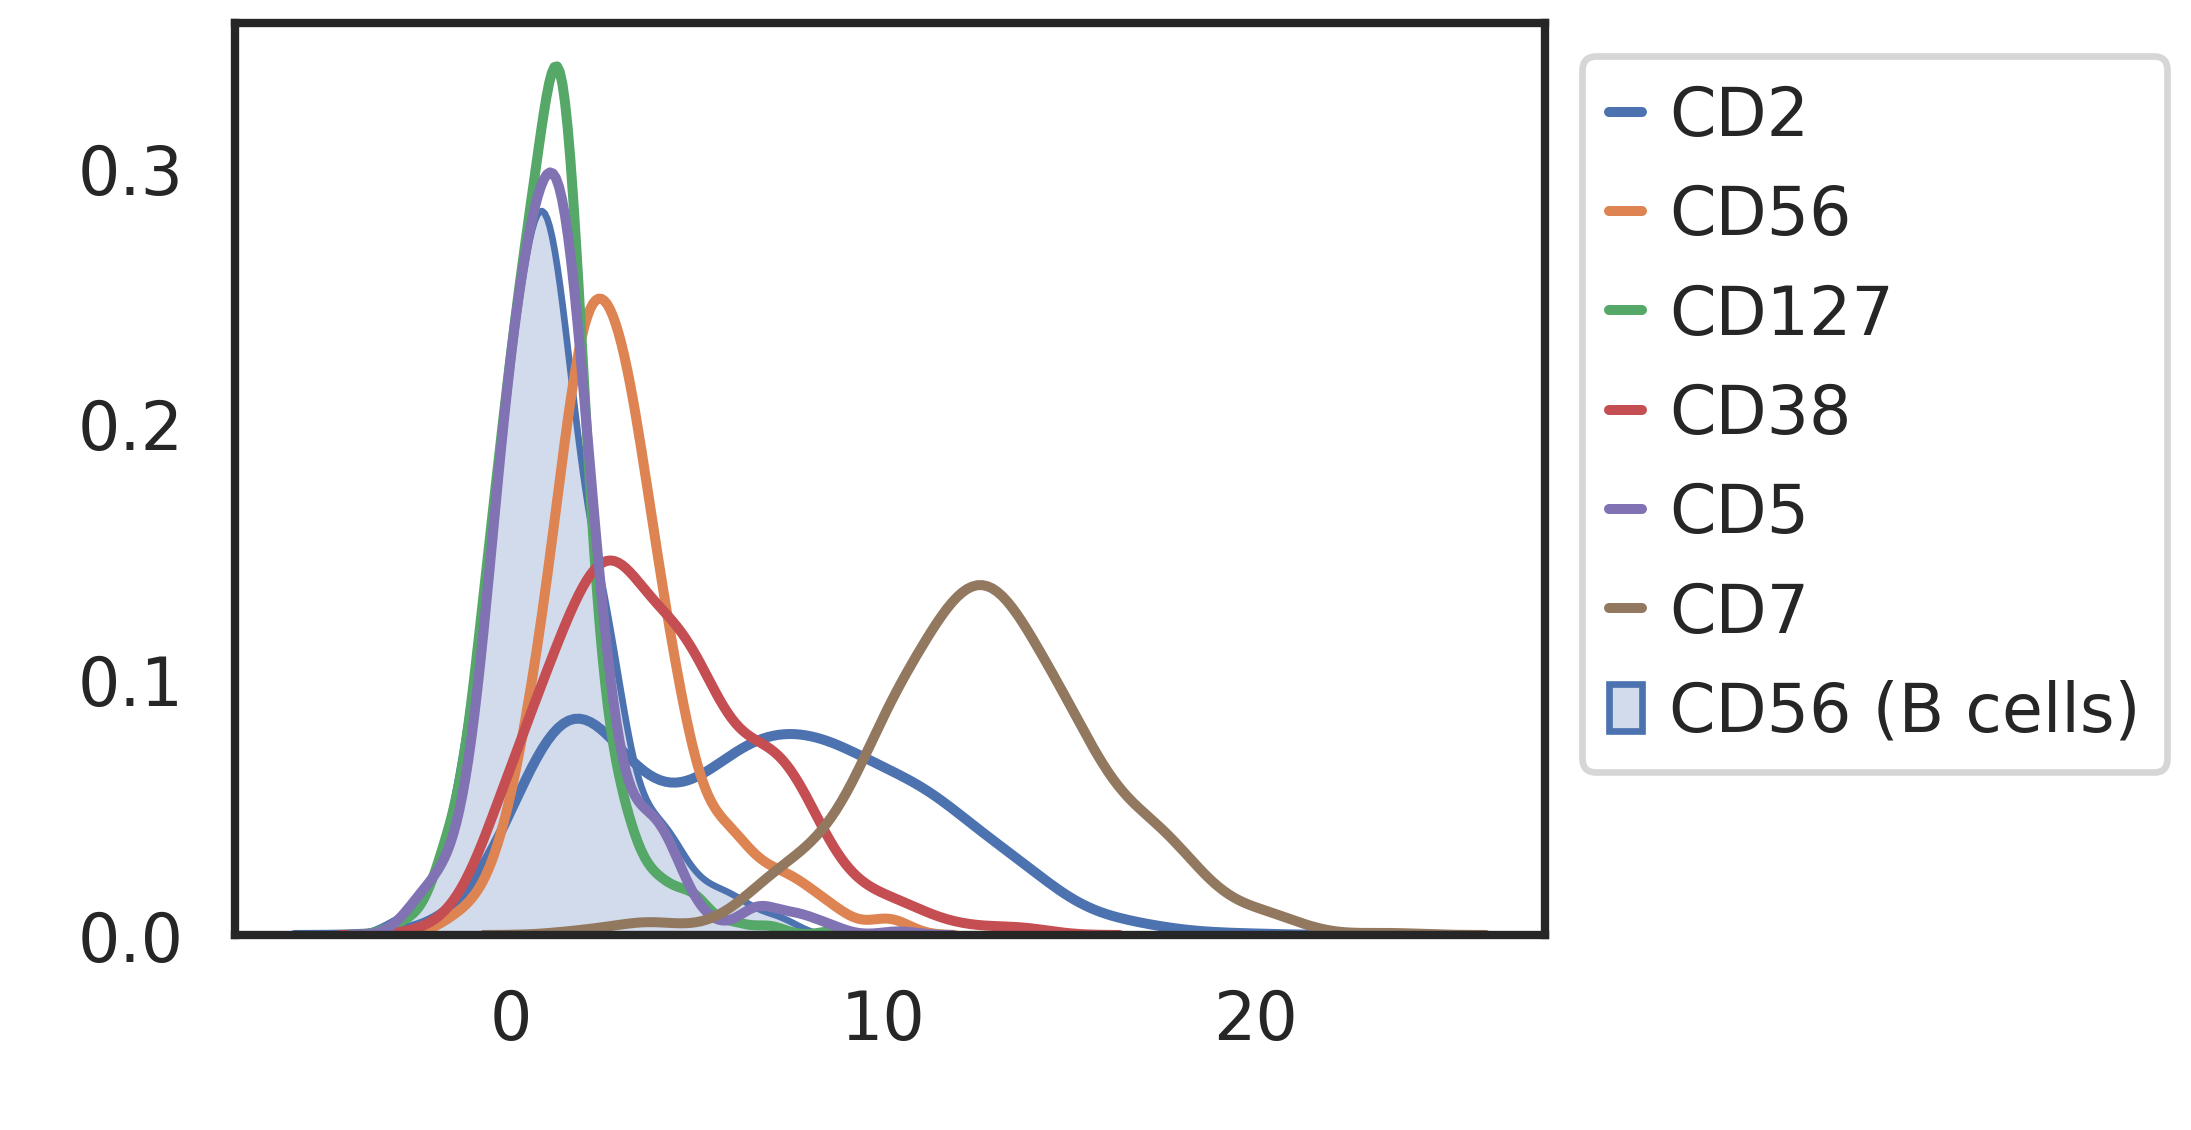

In [13]:
#DSB

sns.set(style='white', font_scale = 0.5, context='poster', rc={'figure.figsize':(7,5)})


markers = nk_markers

for marker in markers:
    a= sns.kdeplot(dsb[marker],
                #fill=True,
                label = marker)
sns.kdeplot(dsb_b["CD56"],
            fill=True,
            label = "CD56 (B cells)")
    
# Plot formatting
plt.legend(prop={'size': 20}, loc='upper right', bbox_to_anchor=(1.5, 1))
#plt.title('Density Plots for selected NK markers, DSB normalized, all aplastic anemia samples')
plt.xlabel(' ')
plt.ylabel(' ')

a.tick_params(axis='y', labelsize=20)
a.tick_params(axis='x', labelsize=20)

plt.show()

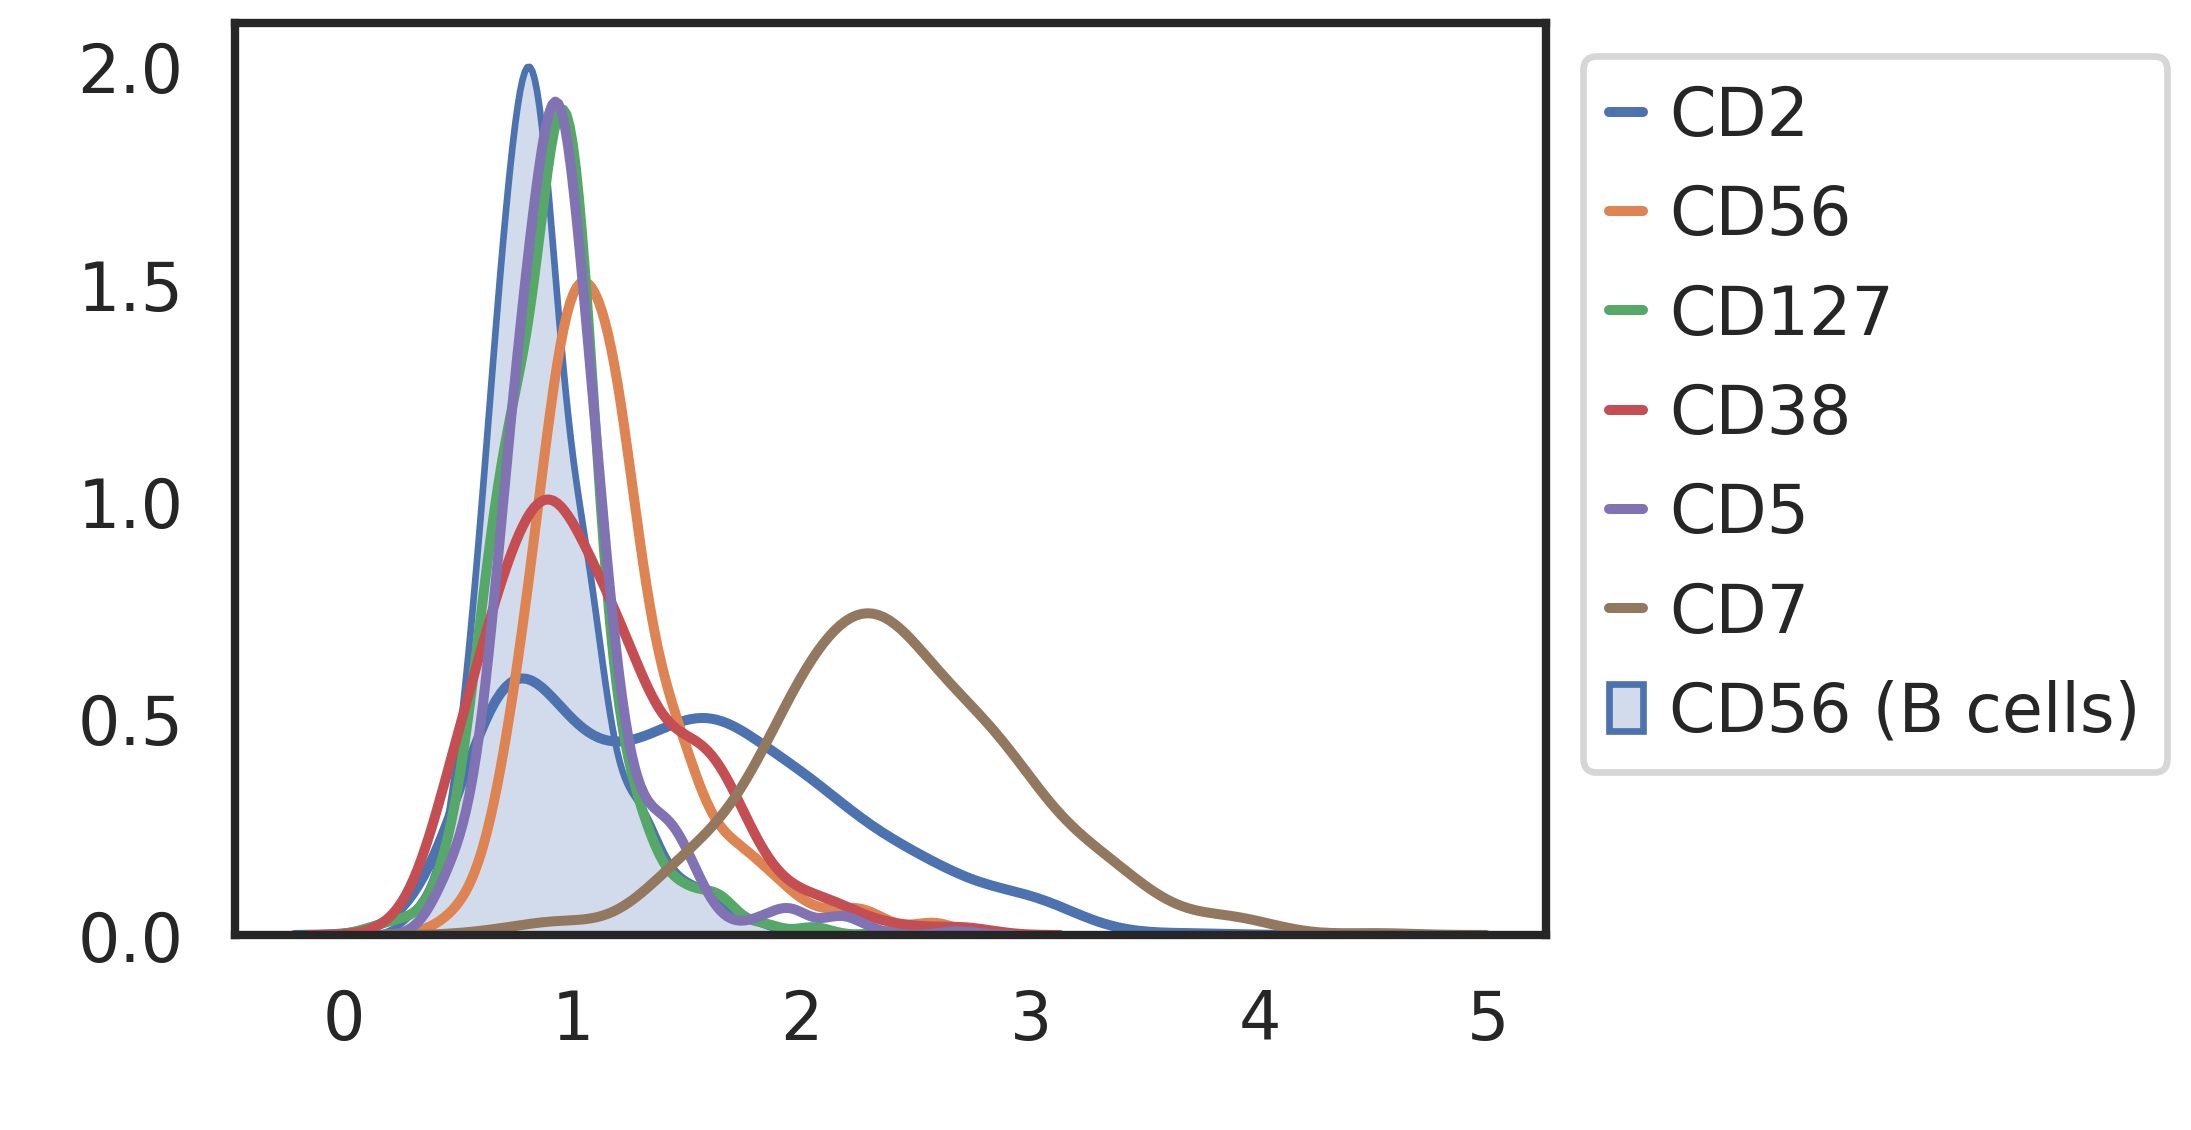

In [14]:
#CLR

#DSB

sns.set(style='white', font_scale = 0.5, context='poster', rc={'figure.figsize':(7,5)})


markers = nk_markers

for marker in markers:
    a= sns.kdeplot(clr[marker],
                #fill=True,
                label = marker)
sns.kdeplot(clr_b["CD56"],
            fill=True,
            label = "CD56 (B cells)")
    
# Plot formatting
plt.legend(prop={'size': 20}, loc='upper right', bbox_to_anchor=(1.5, 1))
#plt.title('Density Plots for selected NK markers, DSB normalized, all aplastic anemia samples')
plt.xlabel(' ')
plt.ylabel(' ')

a.tick_params(axis='y', labelsize=20)
a.tick_params(axis='x', labelsize=20)

plt.show()

### Proportion plots

In [15]:
#Sample names
samples=adata_subset_nk.obs['SAMPLE_CODE'].unique().tolist()

samples

['EG34', 'EG35', 'EG36']

In [16]:
#add cell type columns

dsb = dsb.assign(cell_type = "NK cell")
clr = clr.assign(cell_type = "NK cell")

dsb_b = dsb_b.assign(cell_type = "B cell")
clr_b = clr_b.assign(cell_type = "B cell")

In [17]:
#Combined df

df_dsb=pd.concat([dsb, dsb_b], axis=0)

df_dsb.shape

(1127, 34)

In [18]:
#Combined df

df_clr=pd.concat([clr, clr_b], axis=0)

df_clr.shape

(1127, 34)

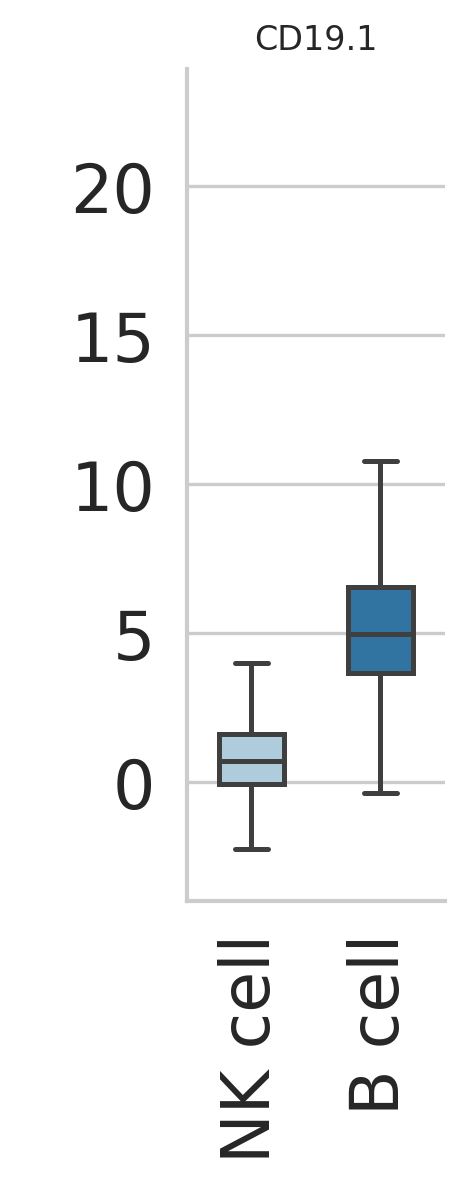

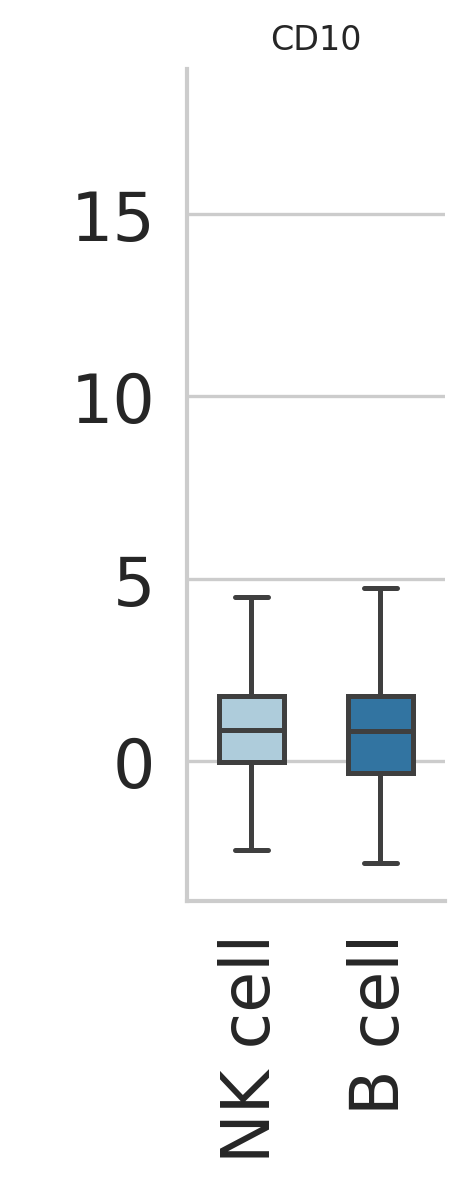

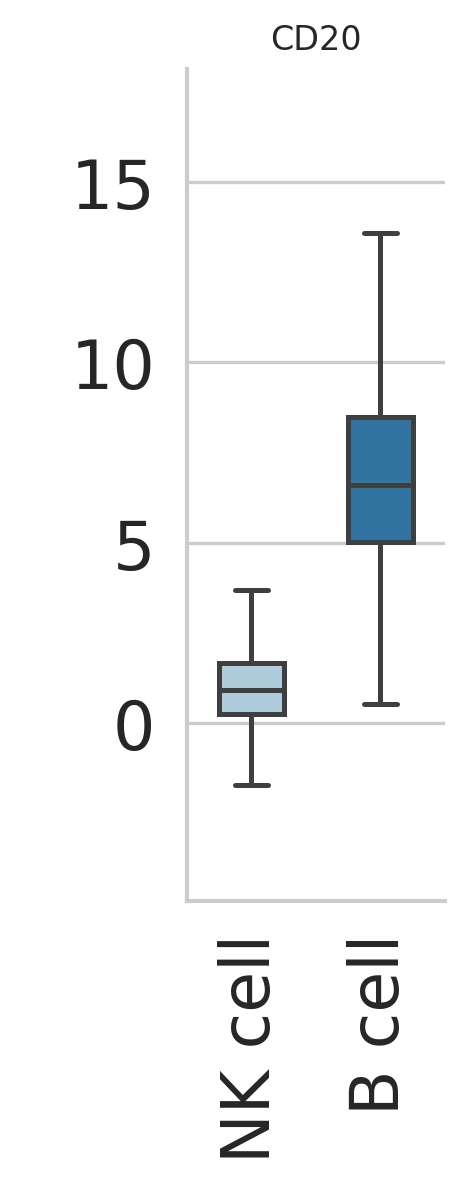

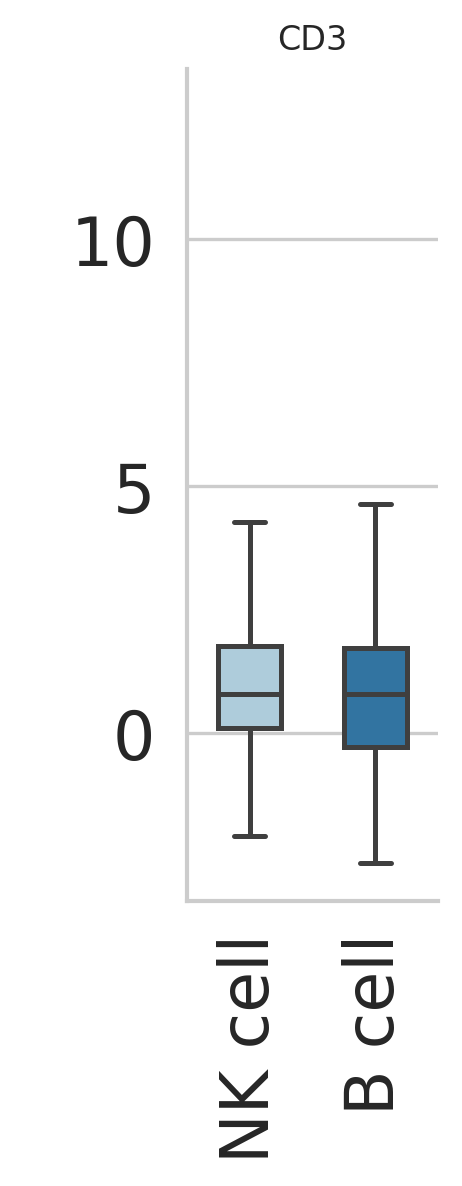

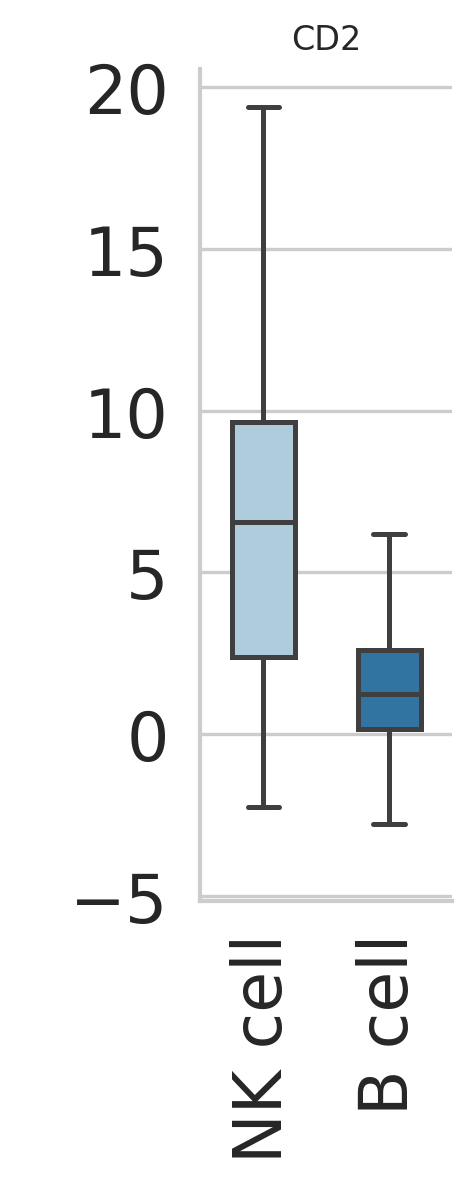

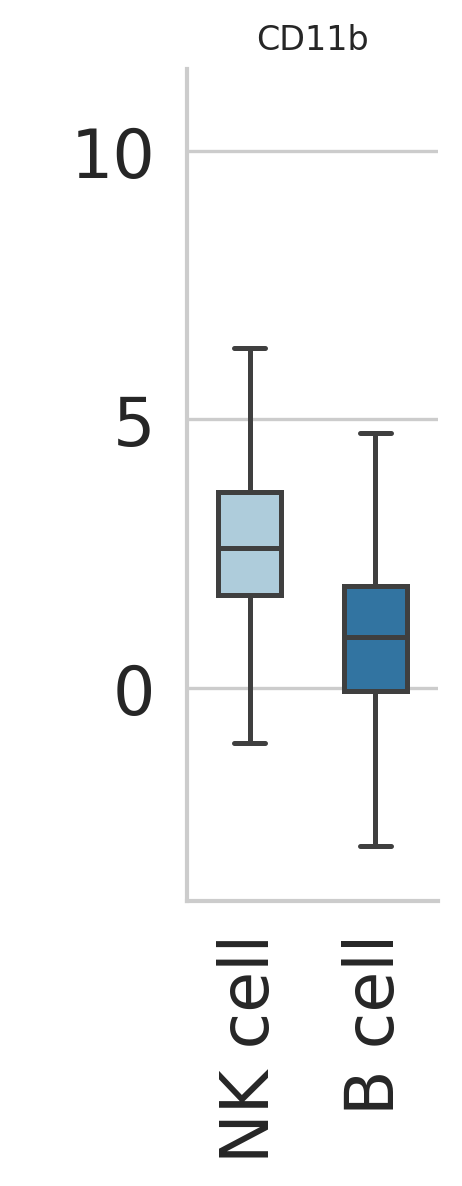

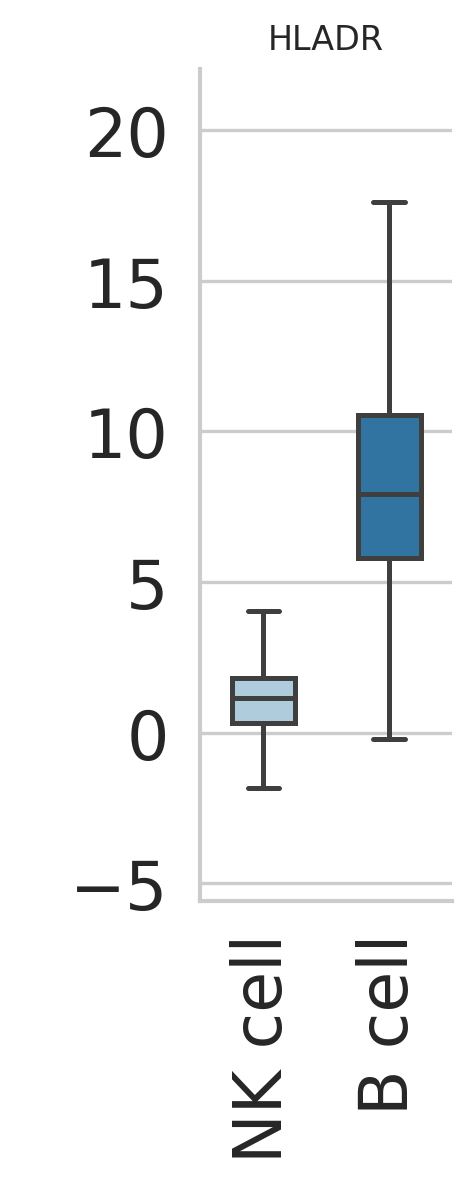

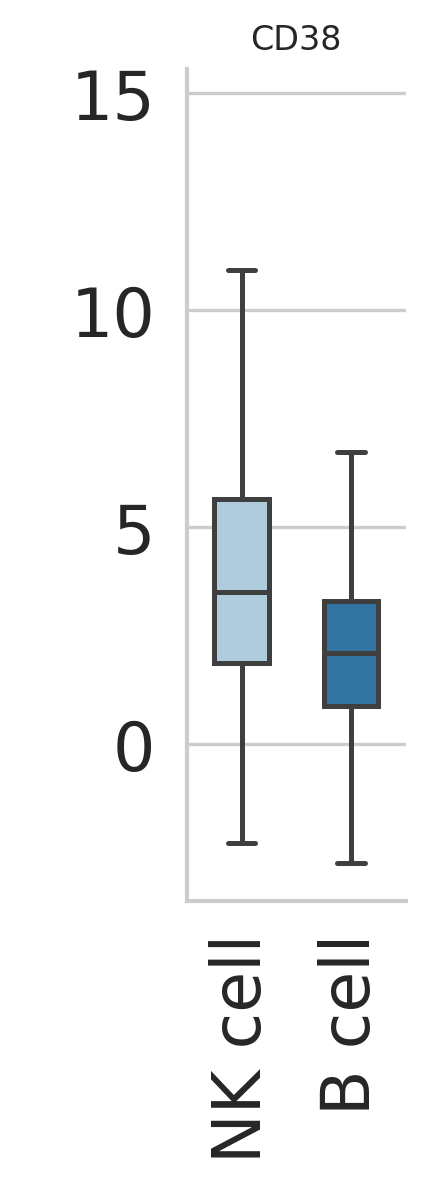

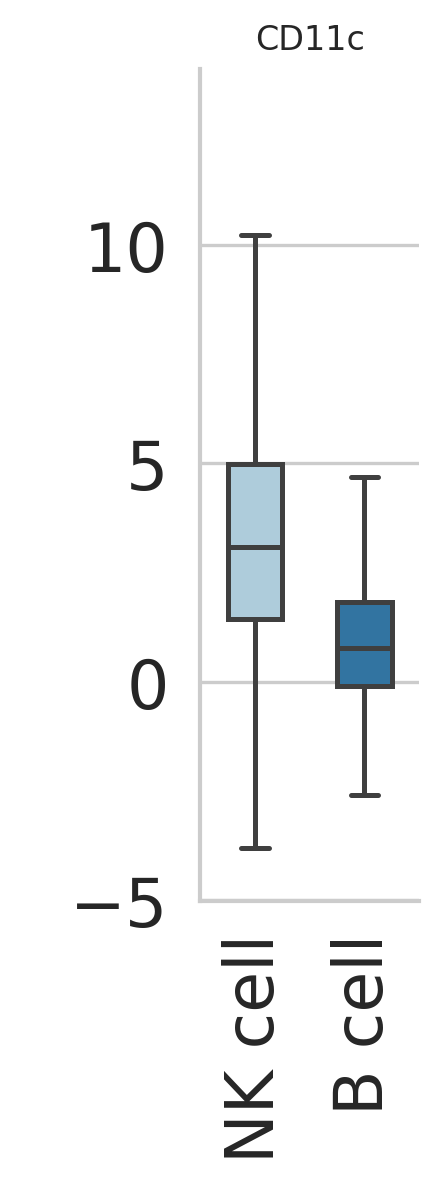

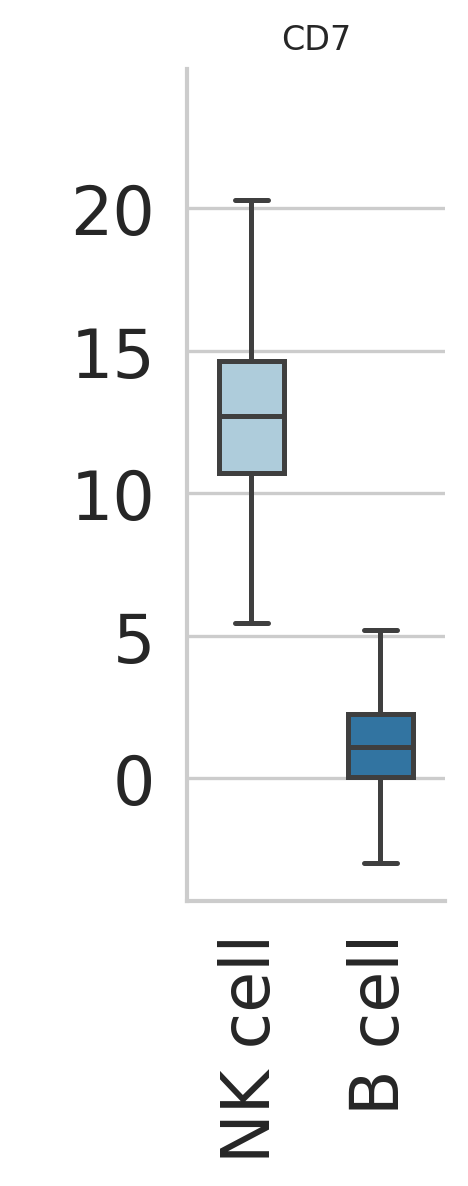

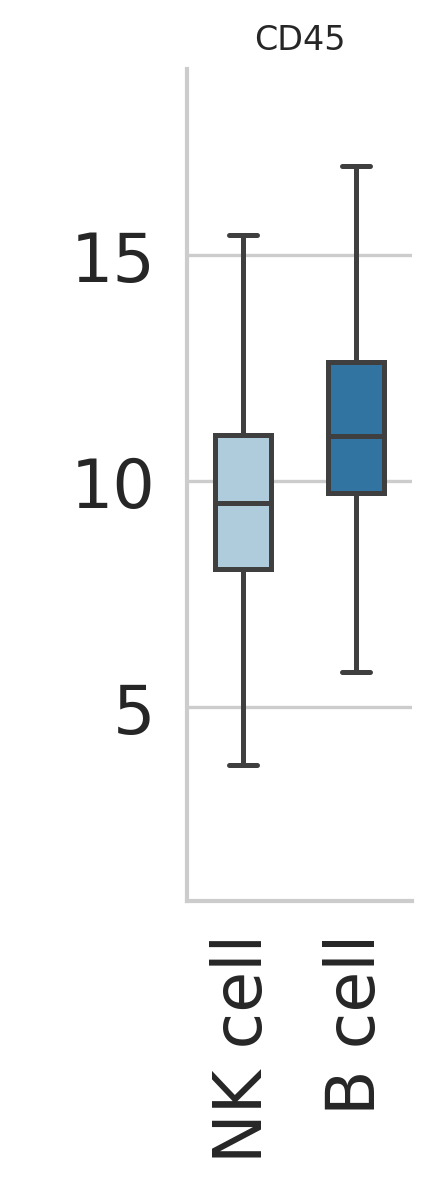

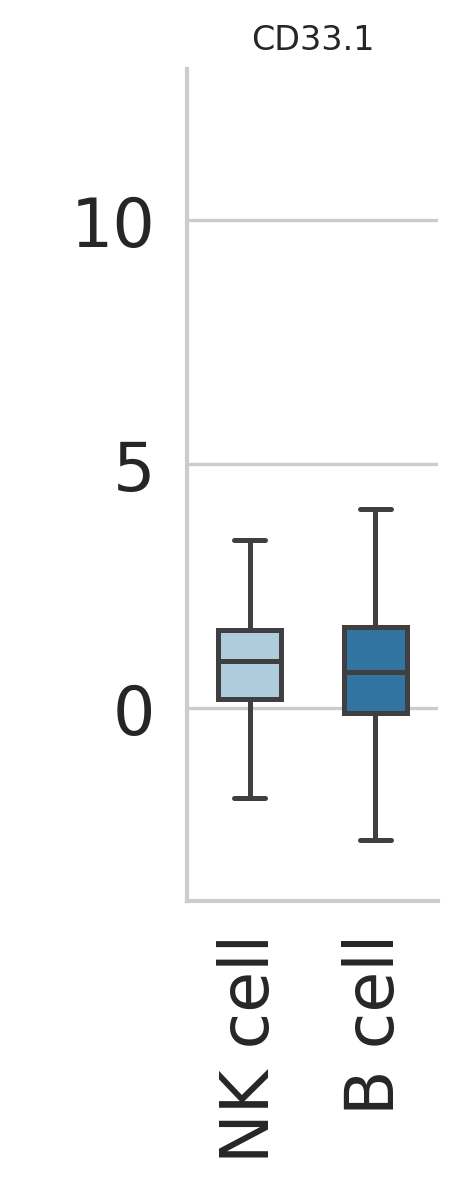

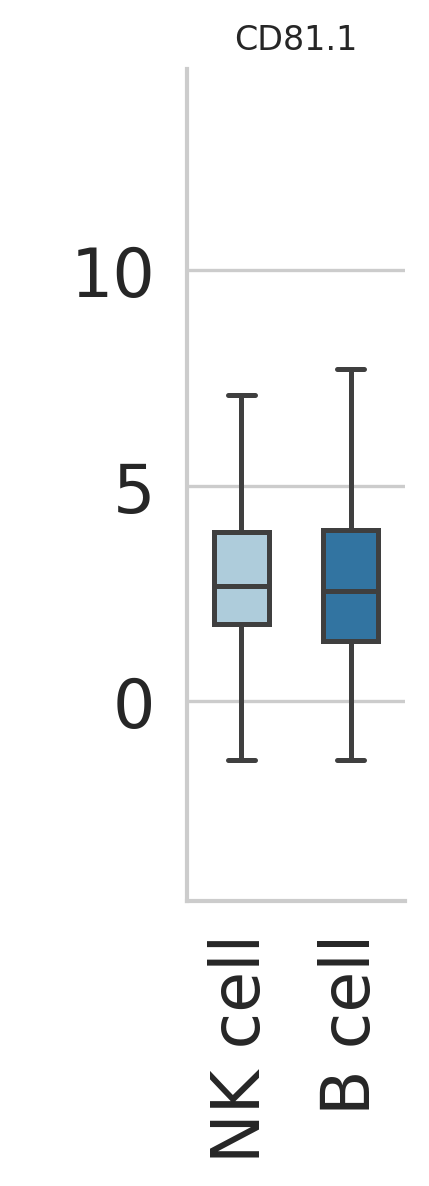

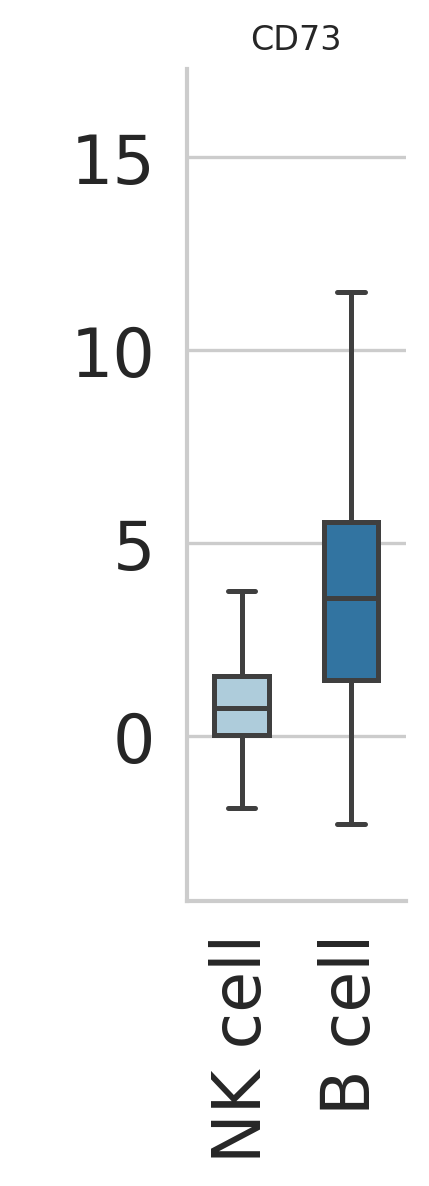

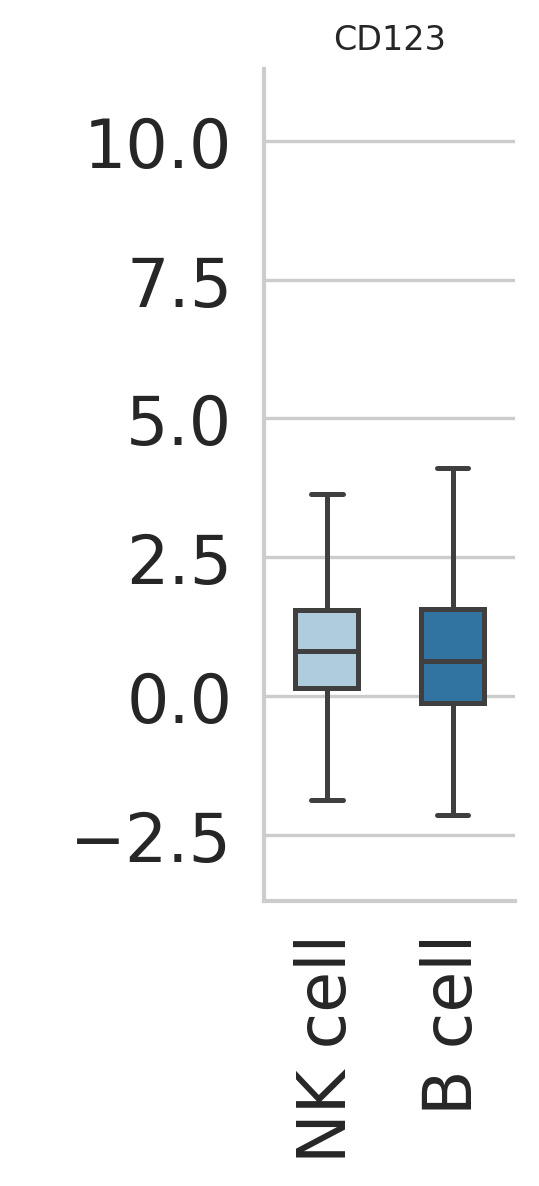

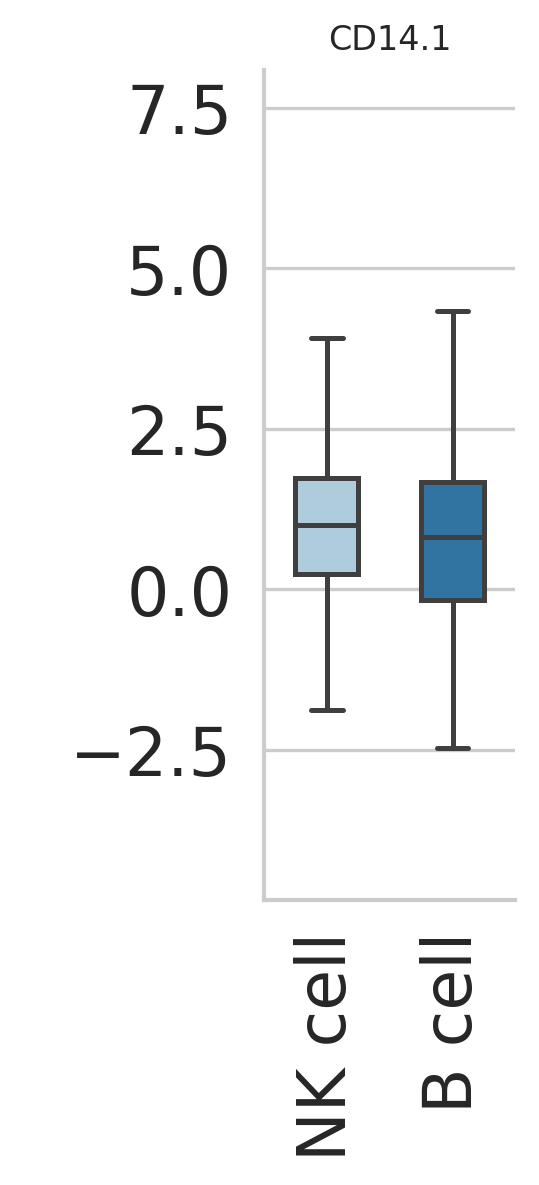

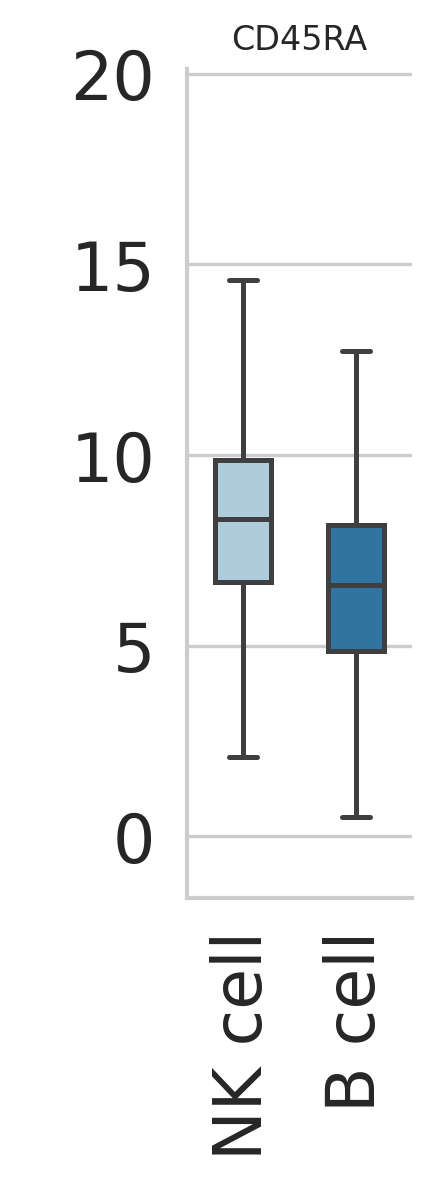

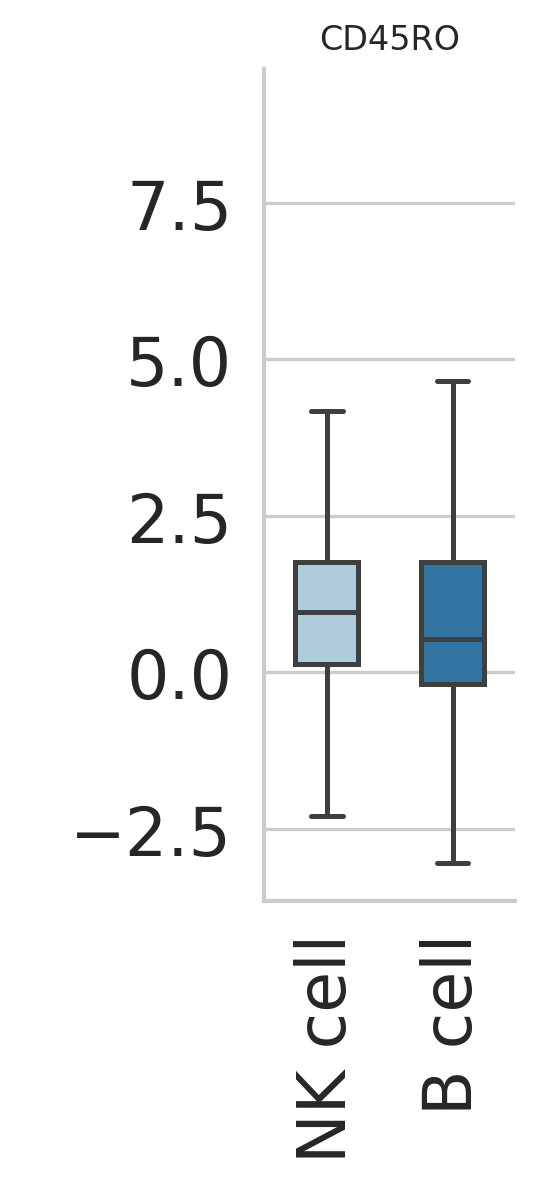

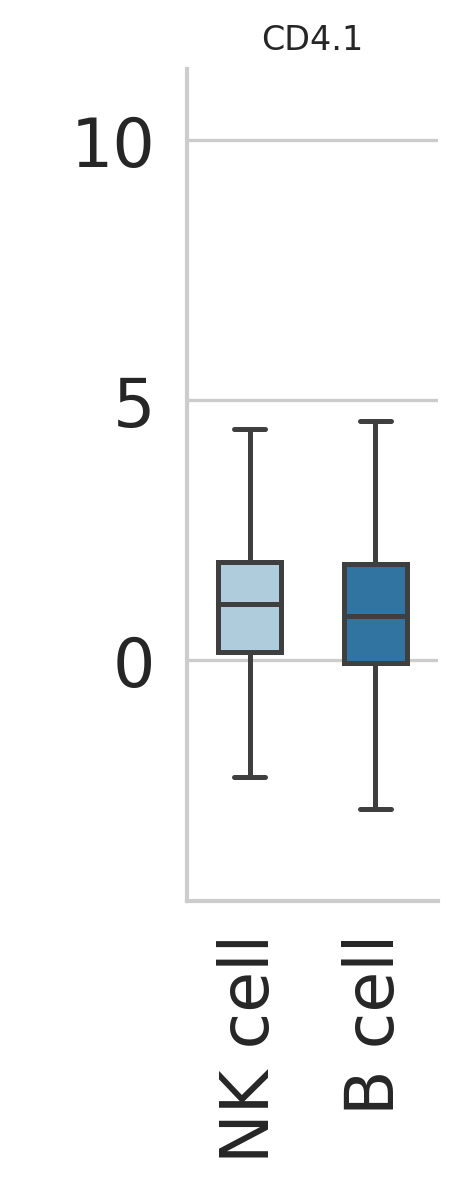

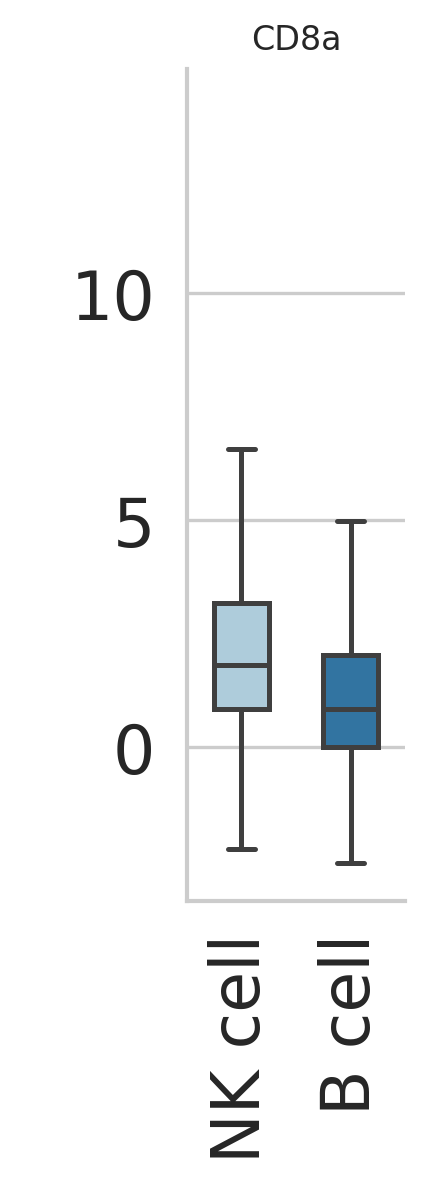

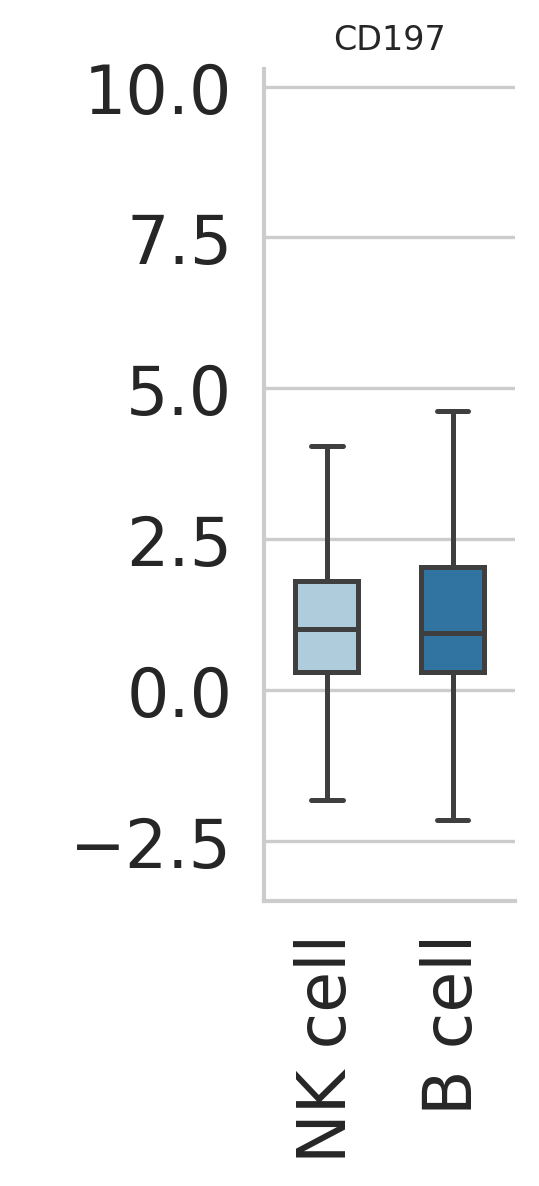

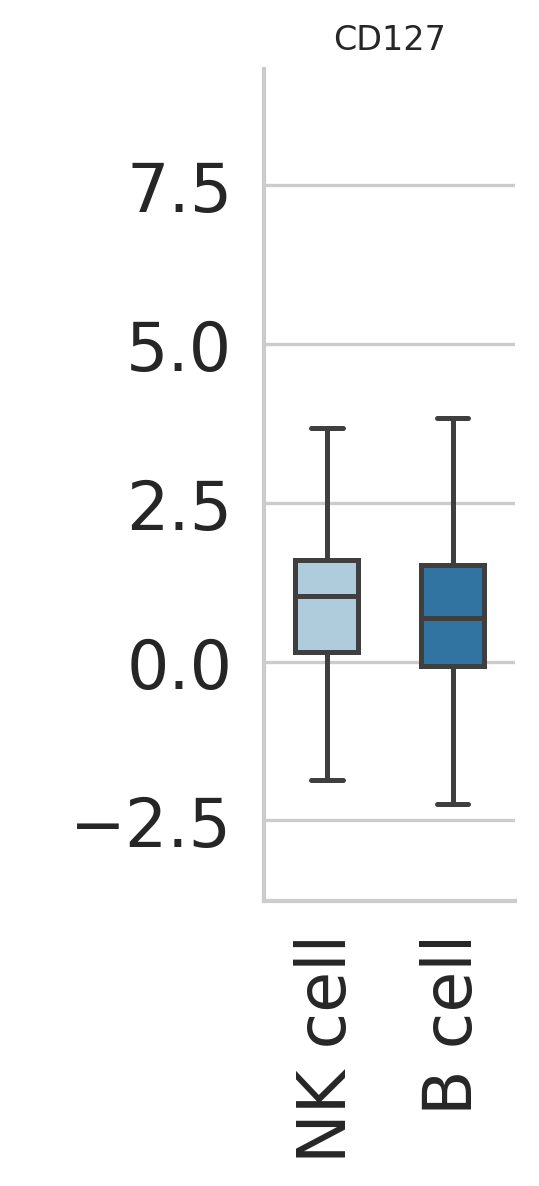

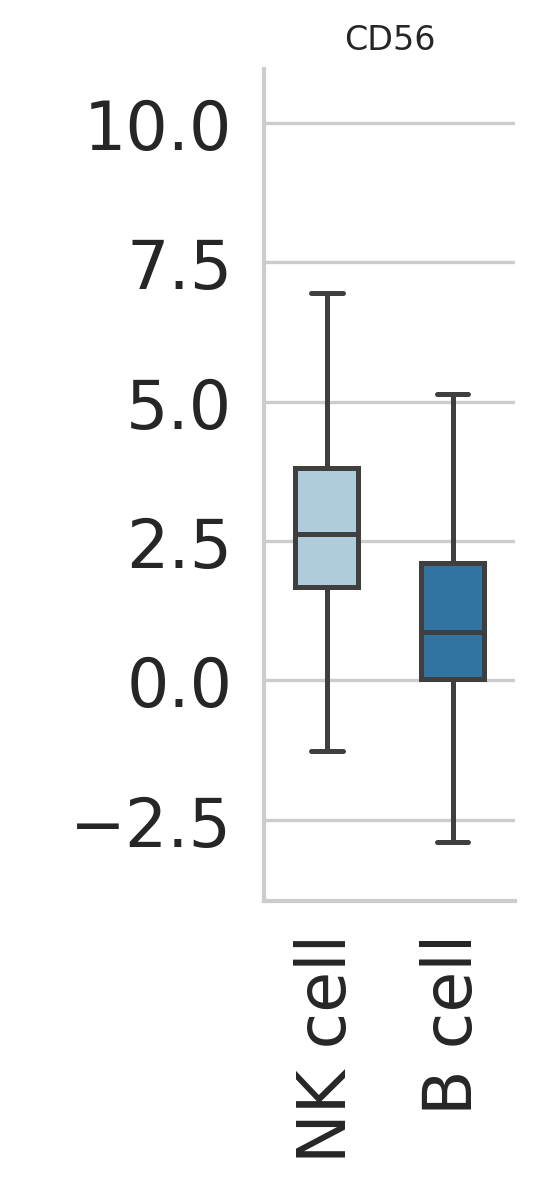

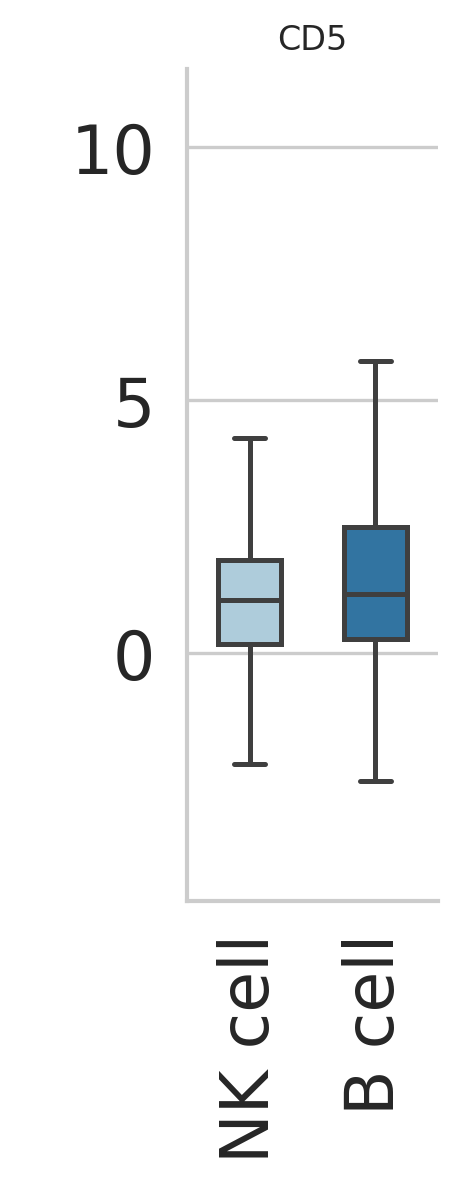

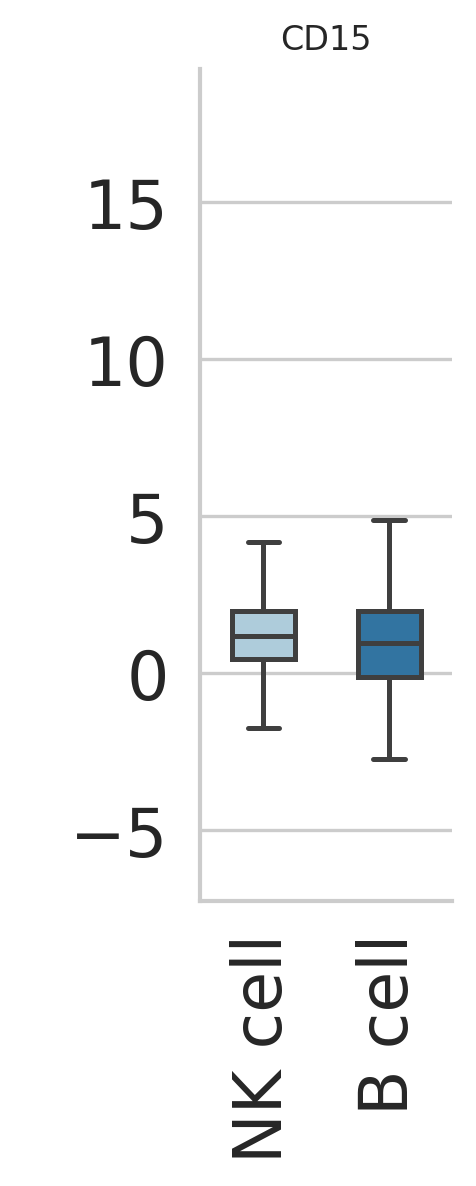

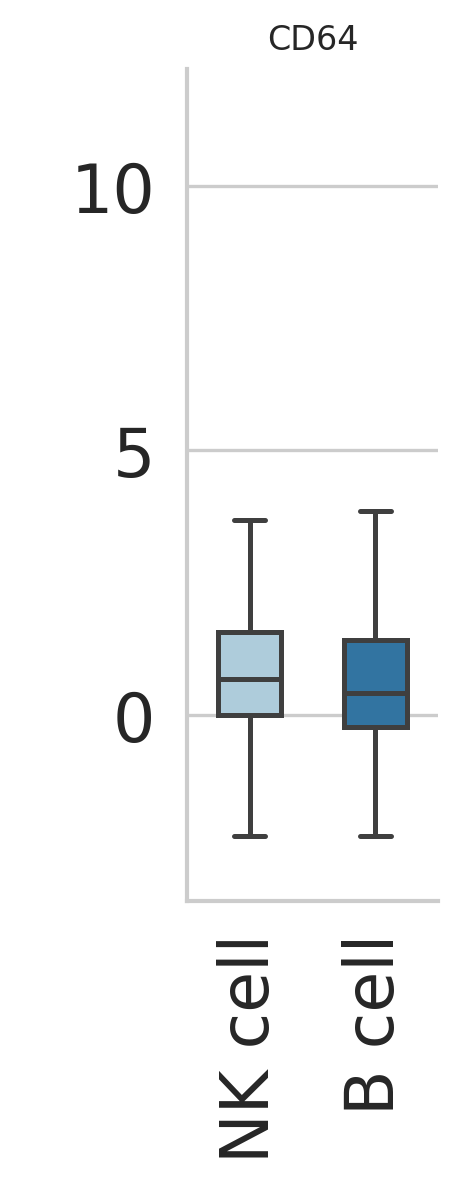

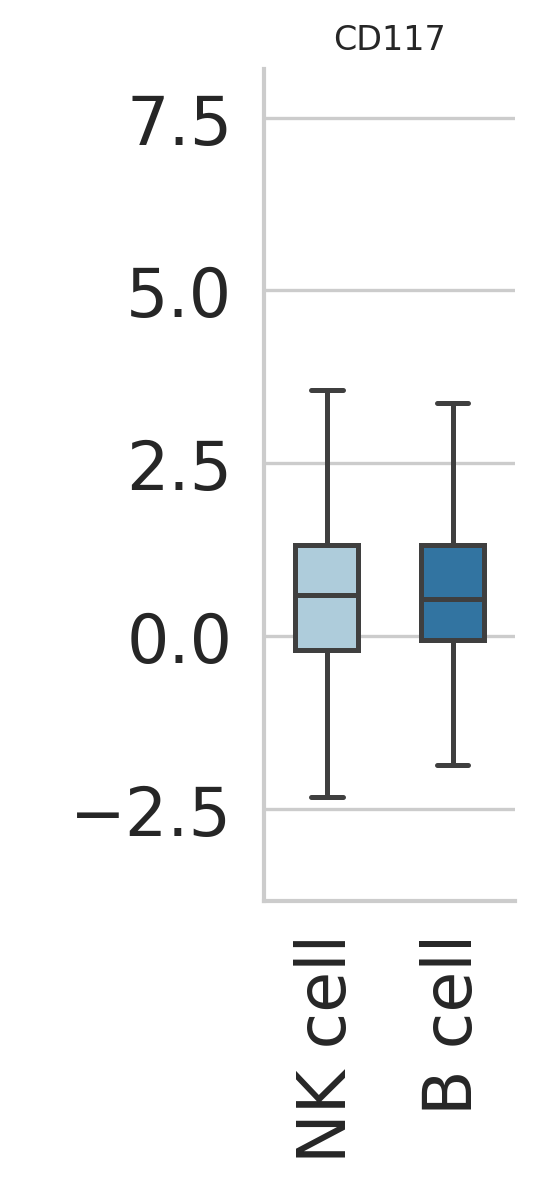

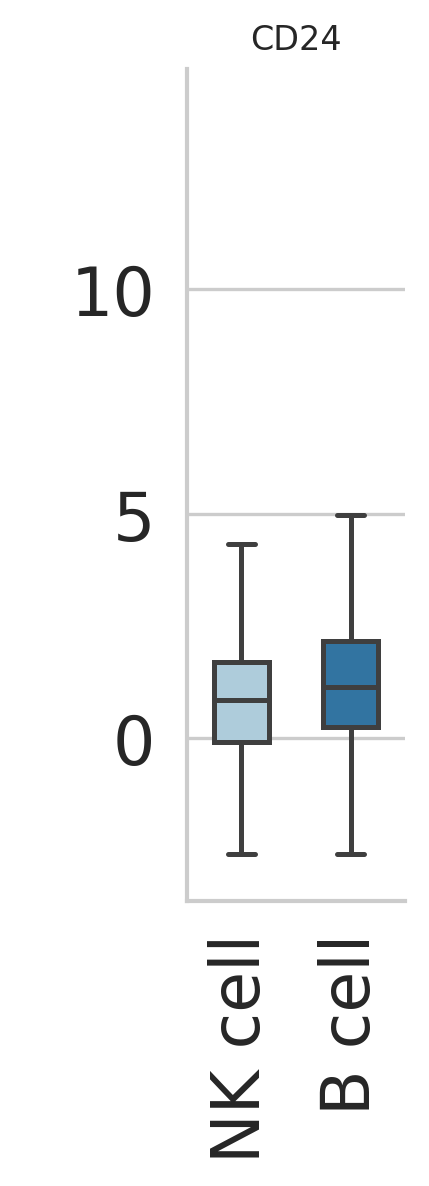

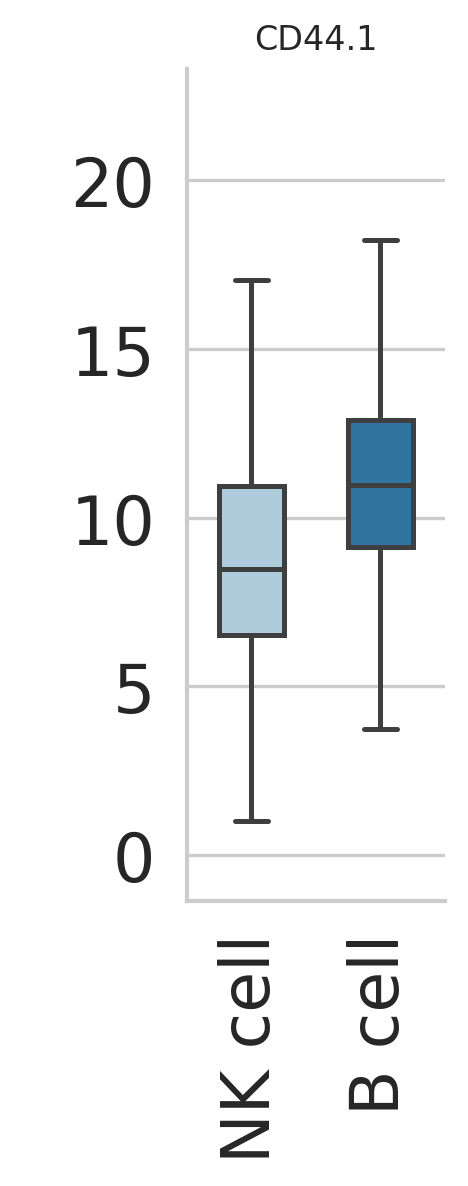

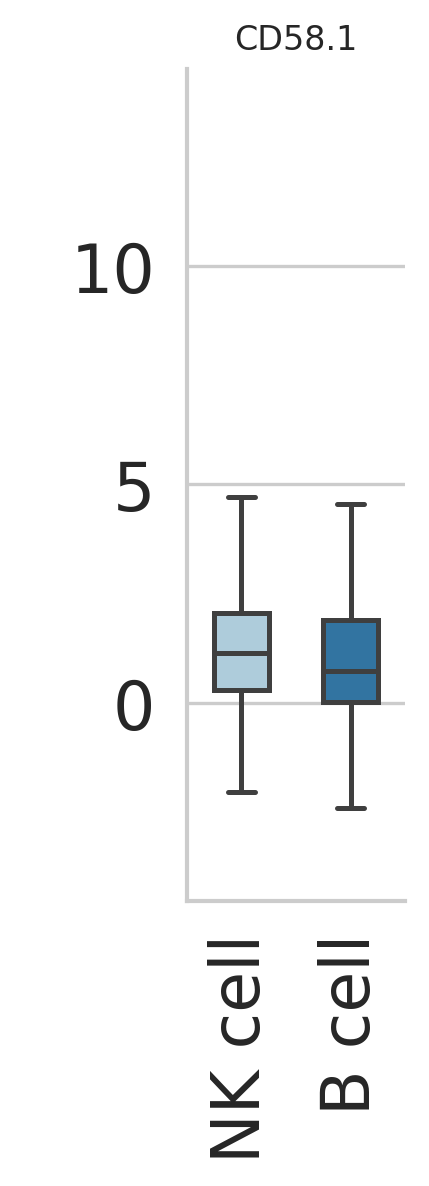

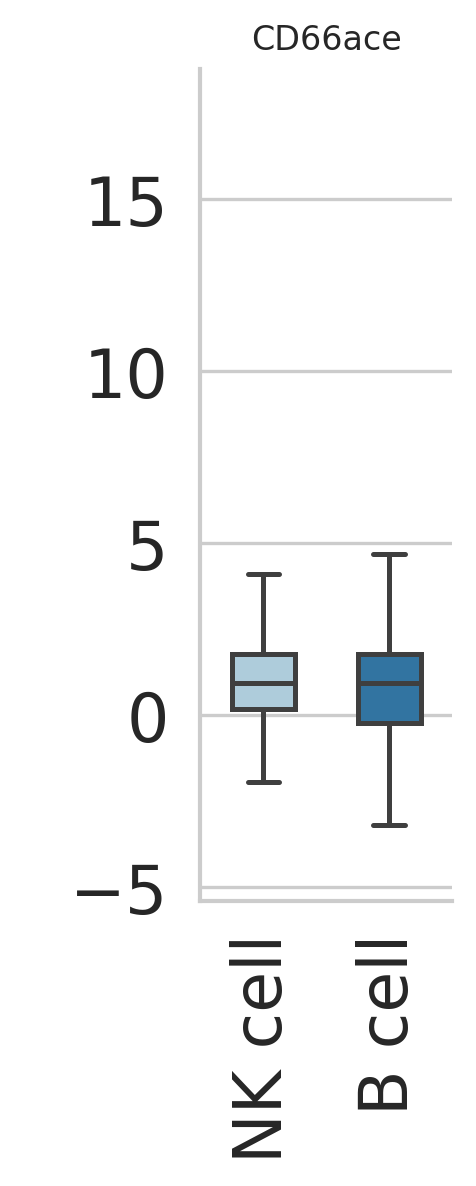

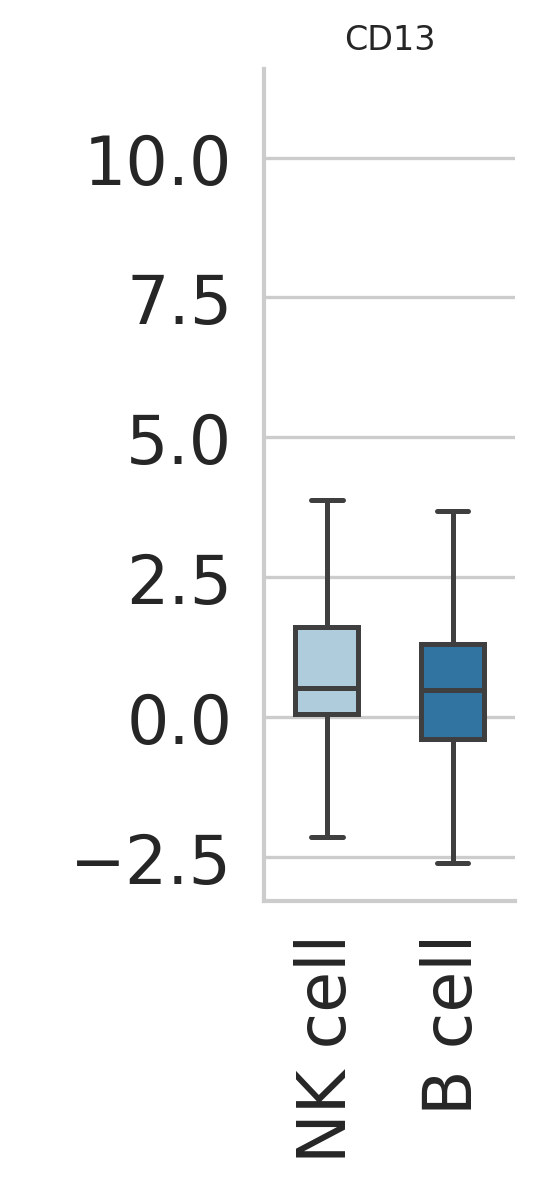

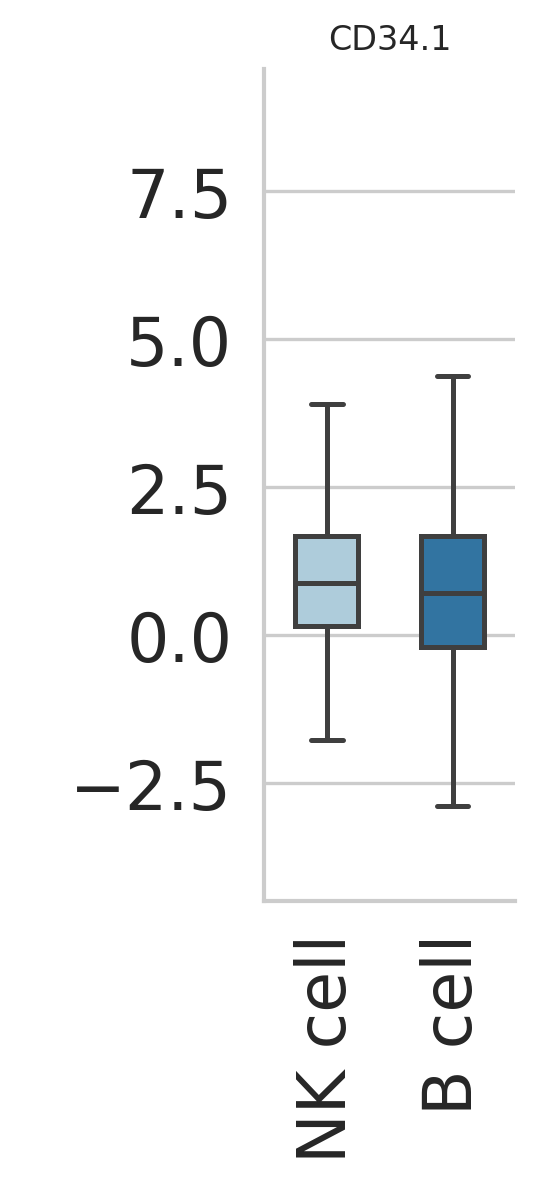

In [19]:
#DSB

for prot in df_dsb[df_dsb.columns[:-1]]:
    sns.set_theme(style = "whitegrid", font_scale= 0.7)
    ax=sns.catplot(x="cell_type", y=prot, hue="cell_type",
            aspect=.3,fliersize=0,dodge=False, 
            kind="box",palette = 'Paired', data=df_dsb,
            width = 0.5)
    ax.fig.set_size_inches(2, 4)
    ax.set_xticklabels(rotation = 90)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.set(xlabel=None)
    ax.set_ylabels(' ', fontsize= 10)
    plt.title(prot, fontsize=10)

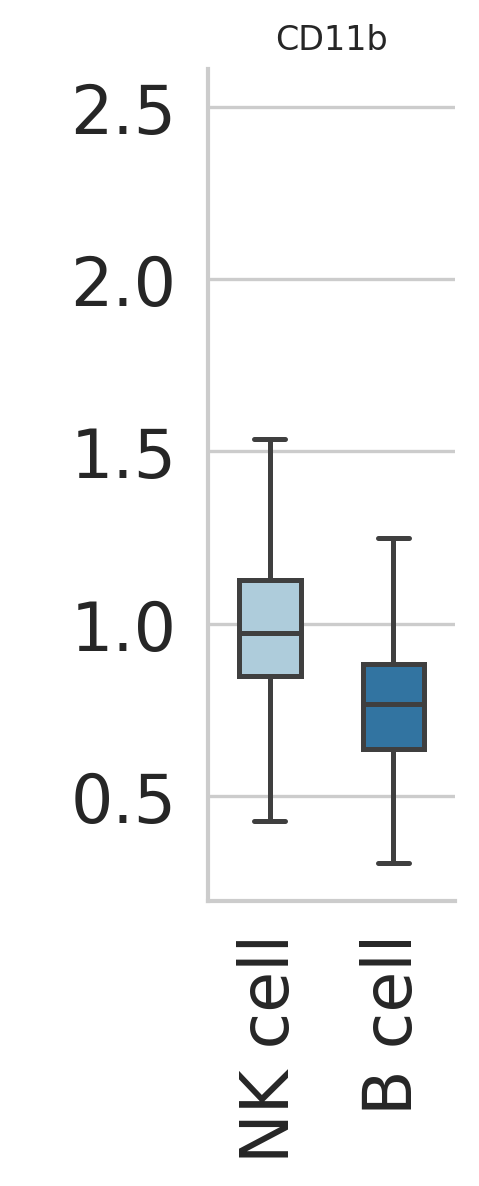

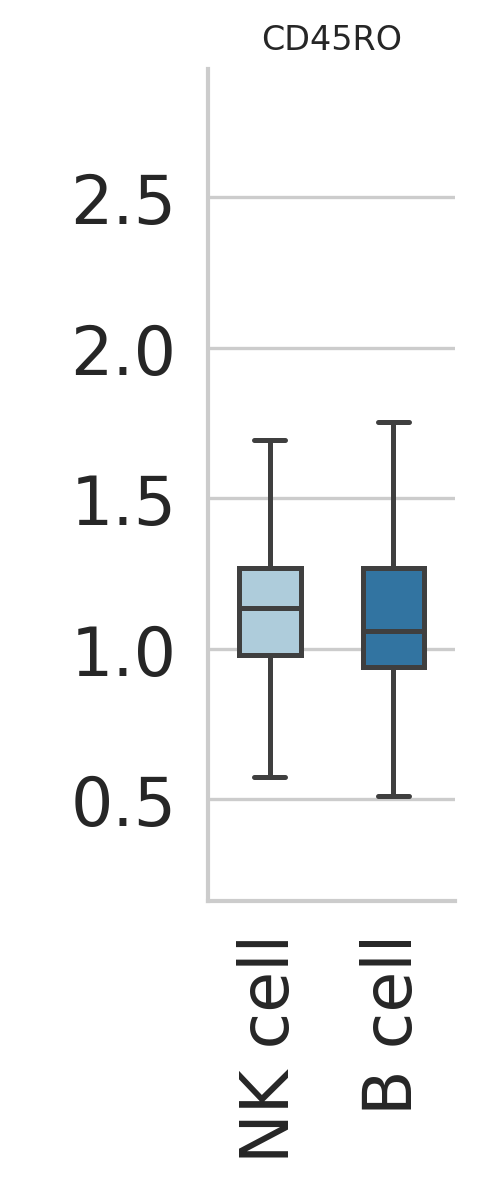

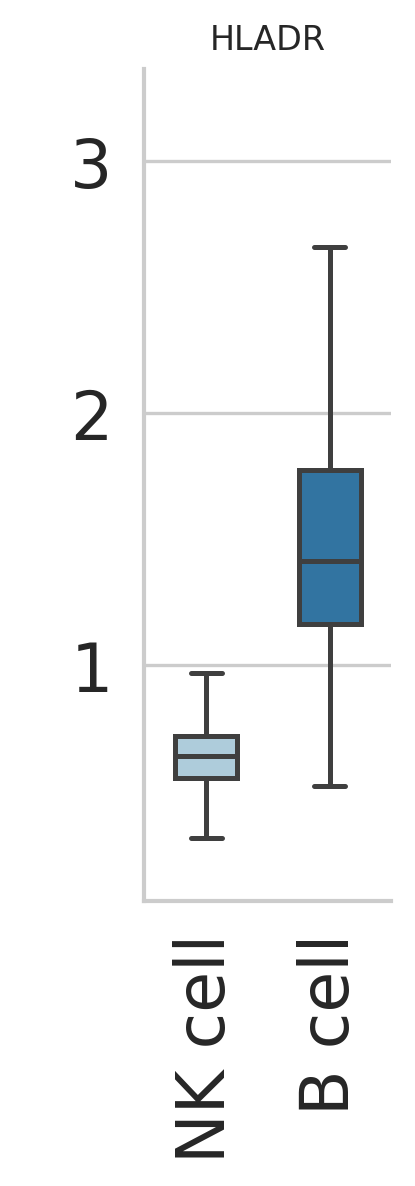

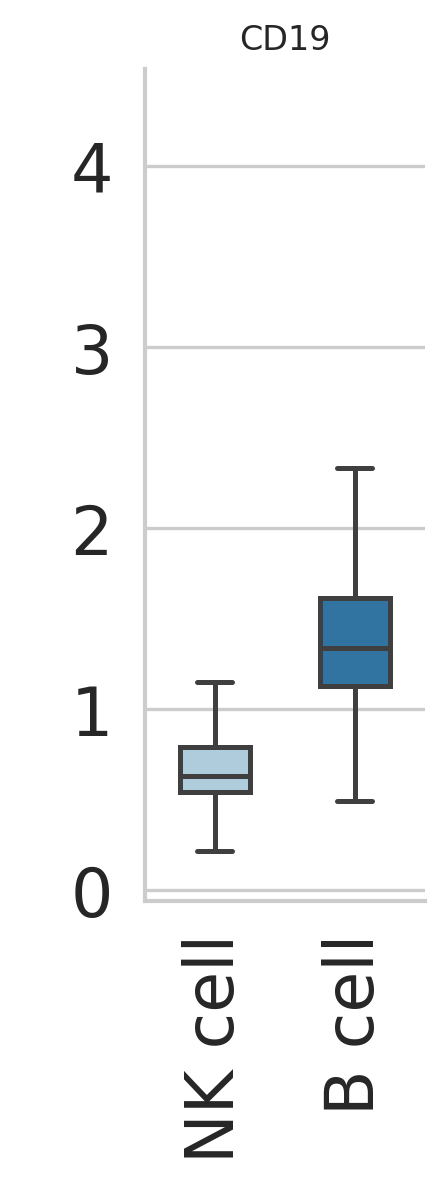

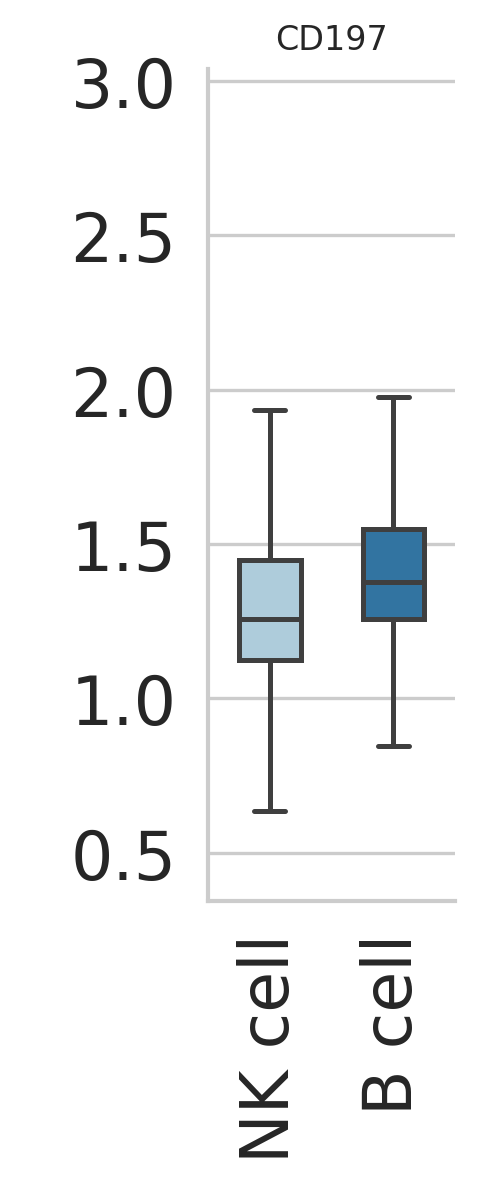

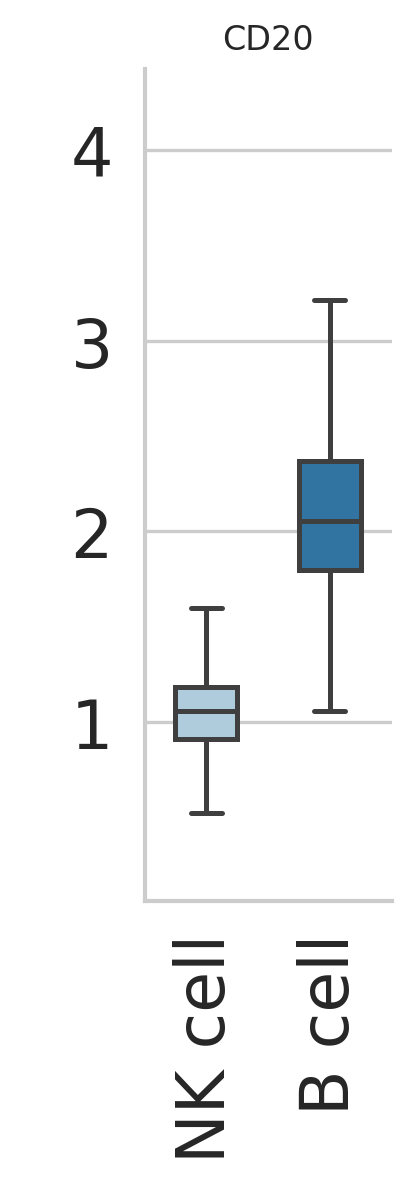

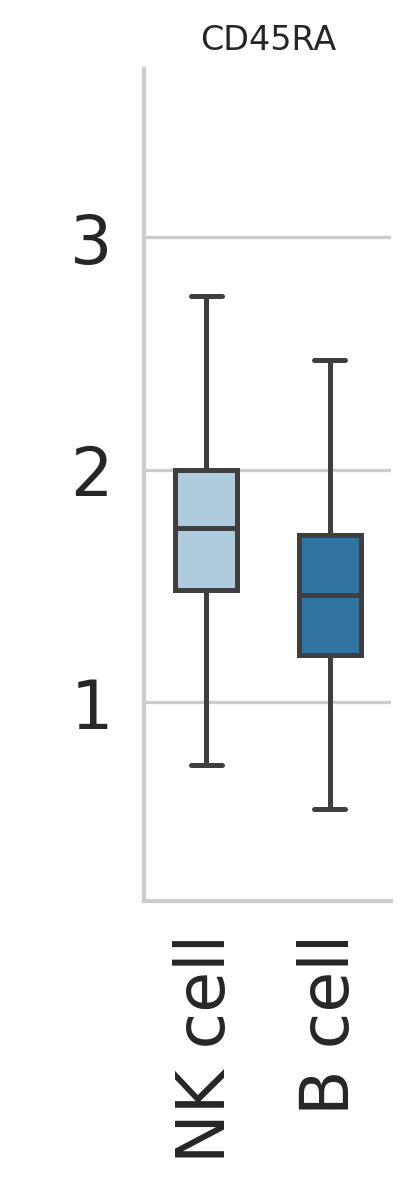

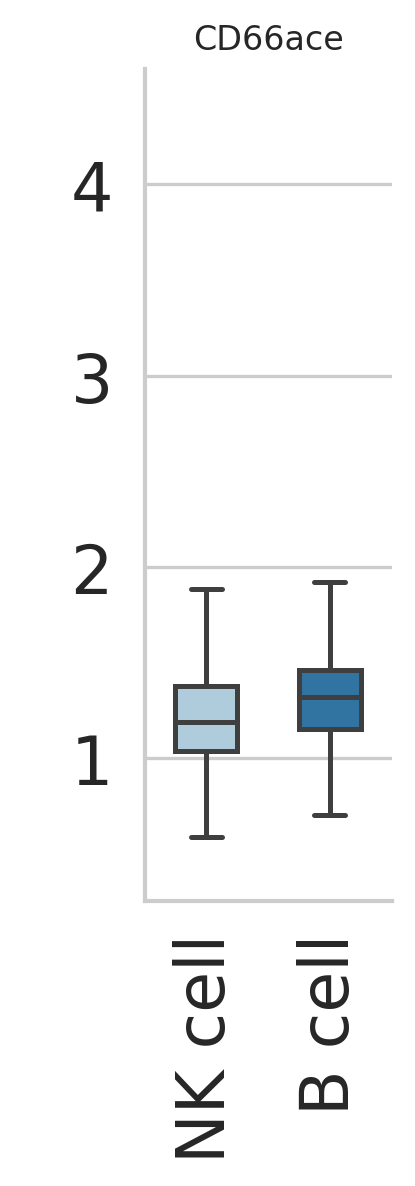

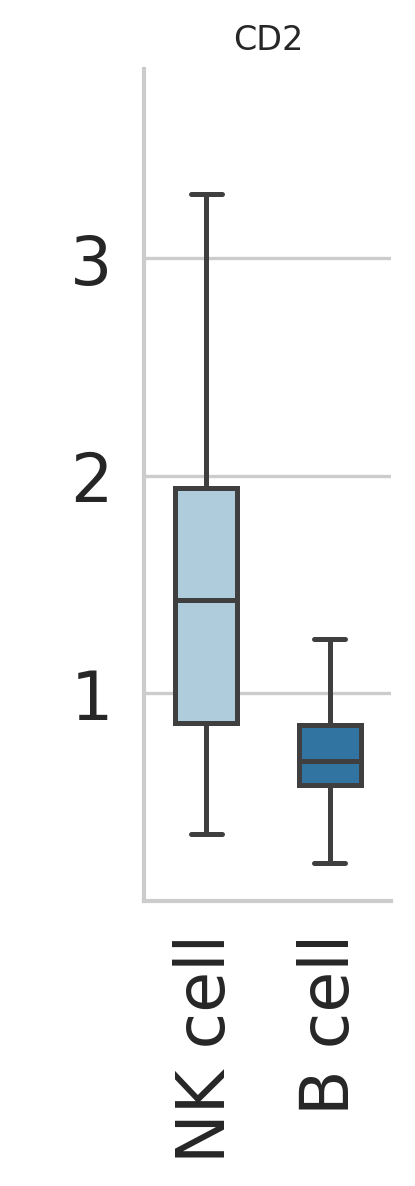

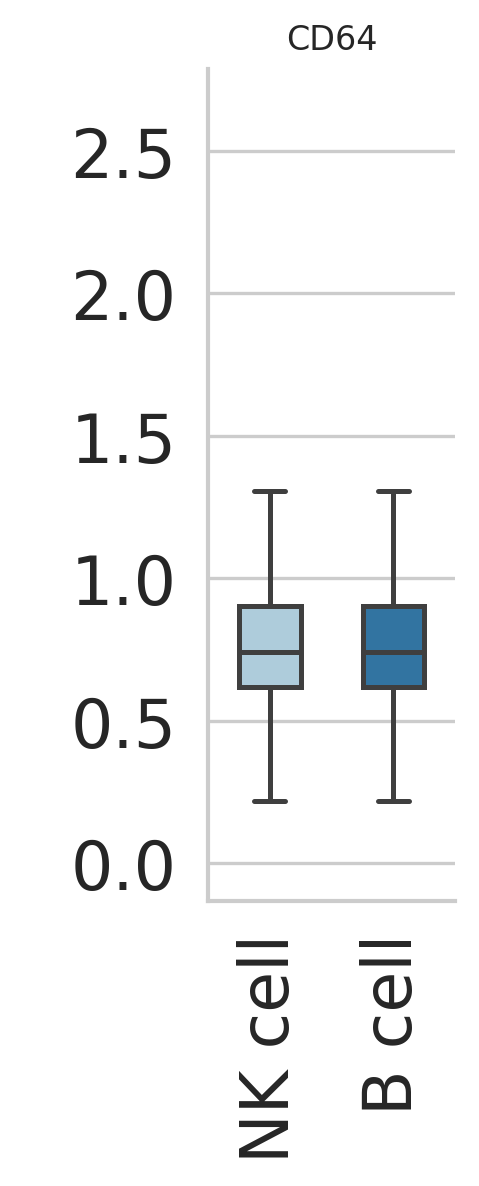

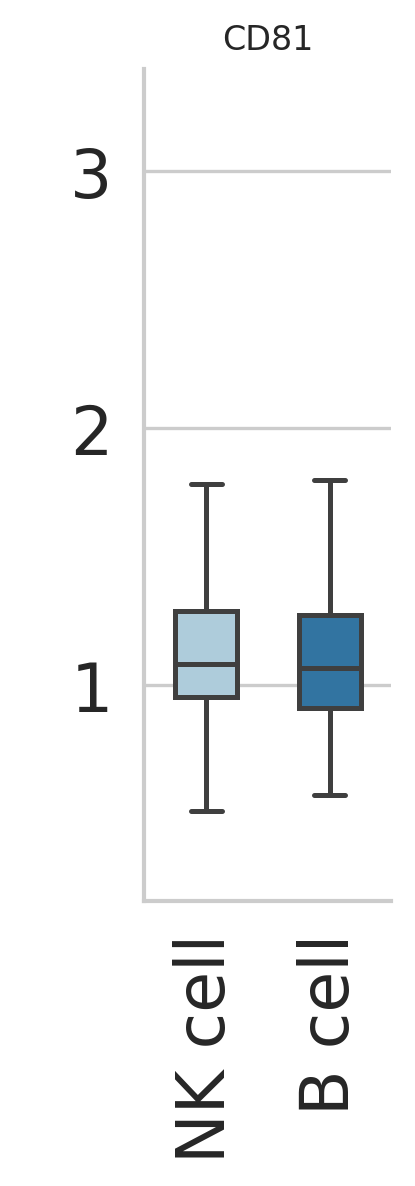

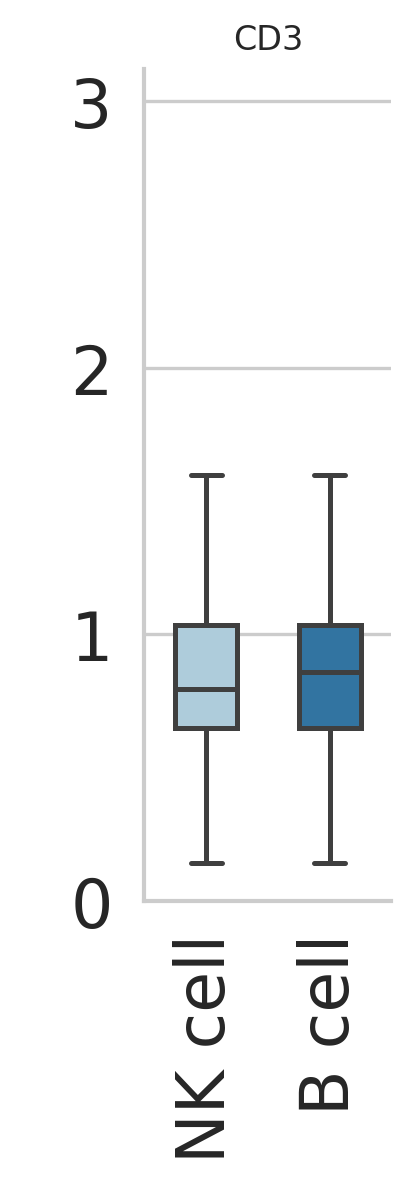

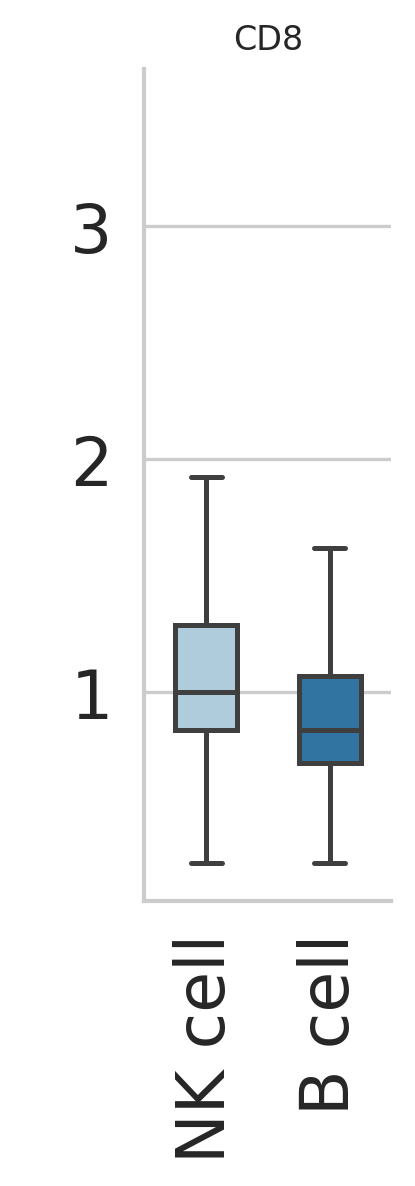

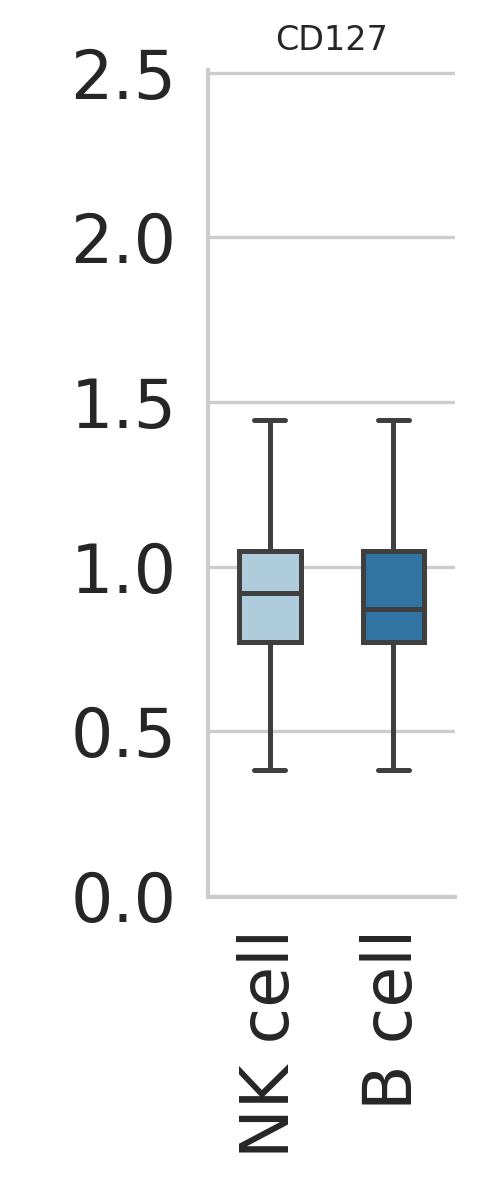

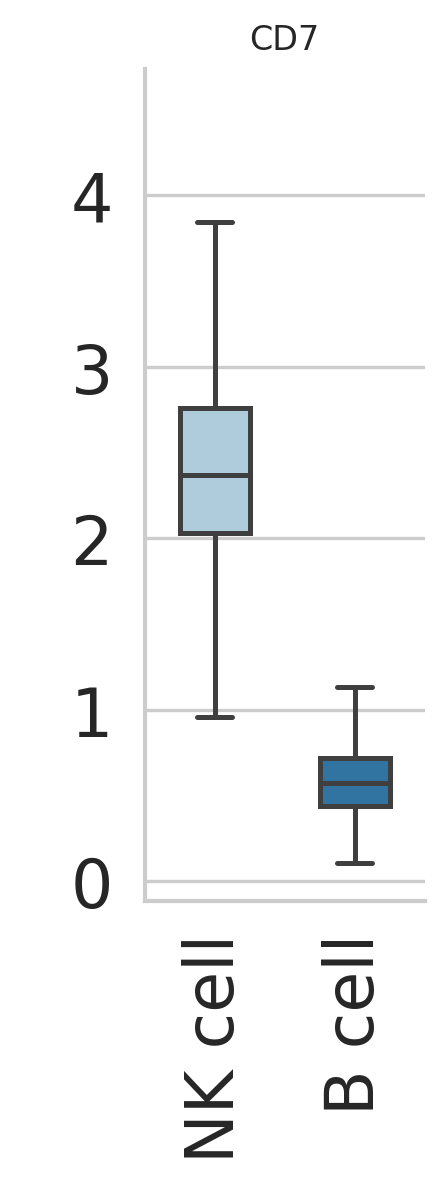

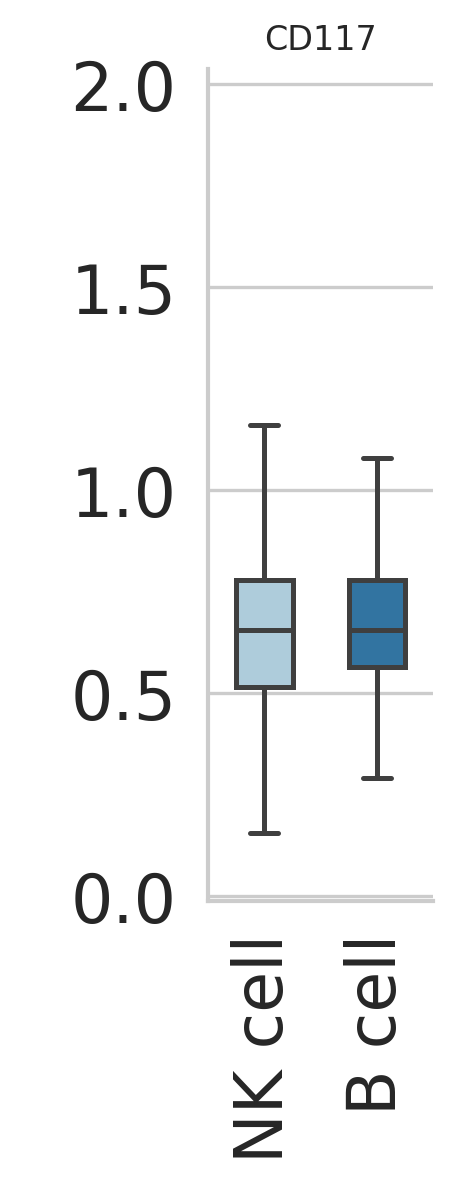

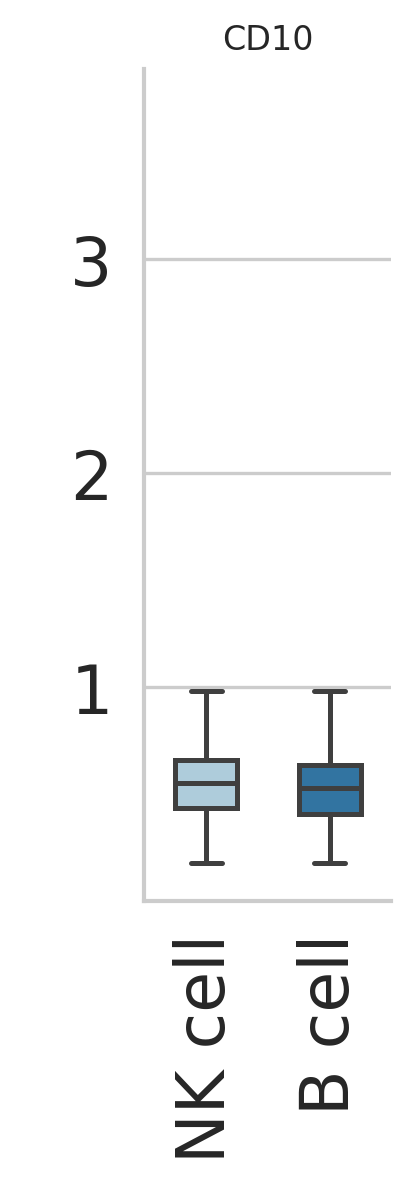

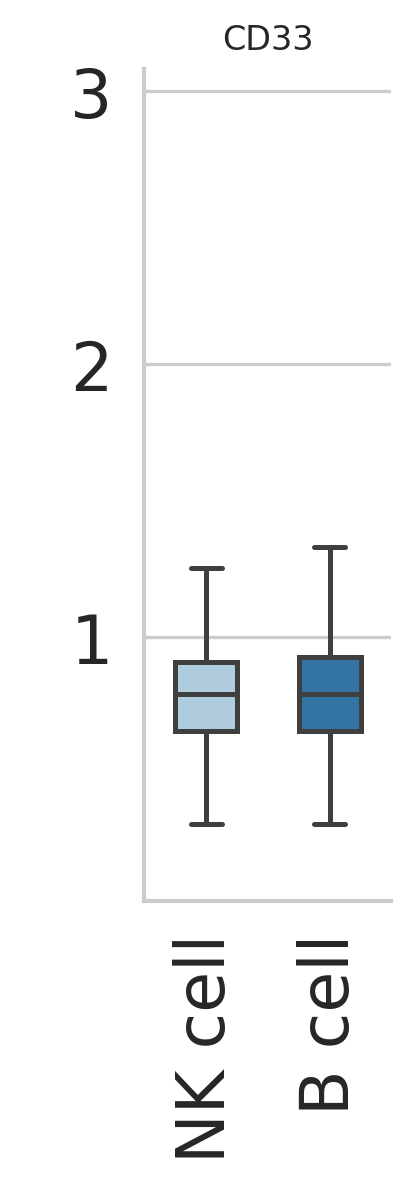

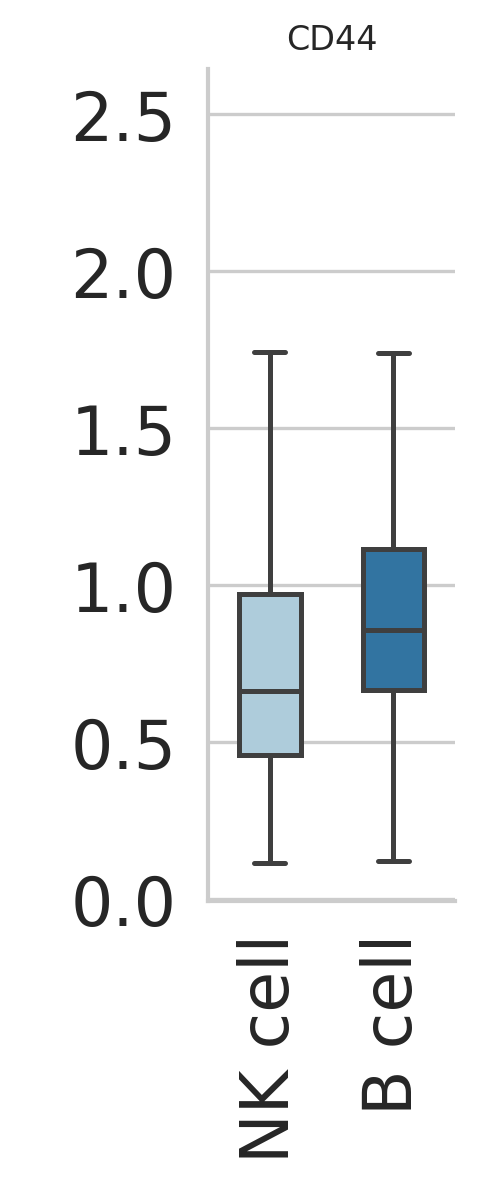

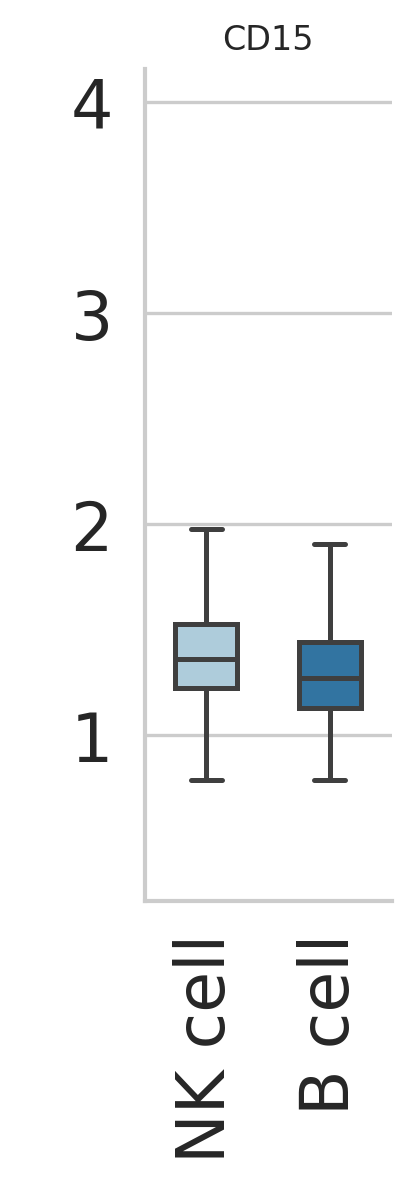

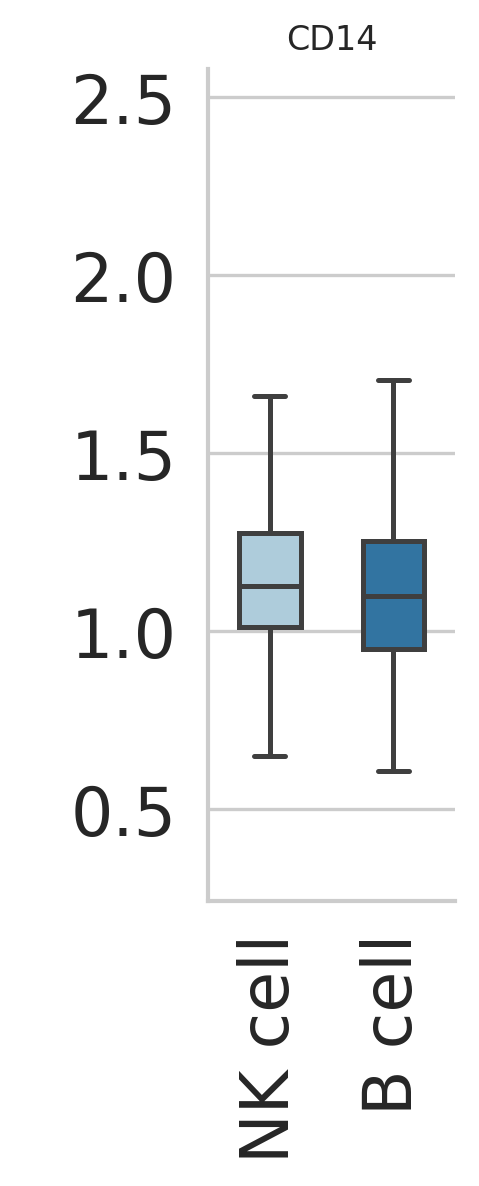

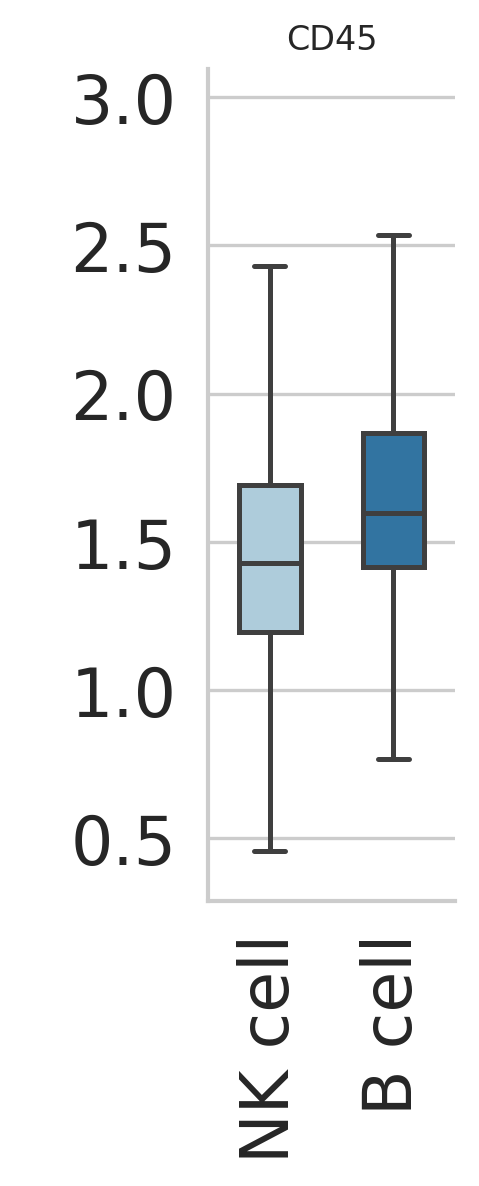

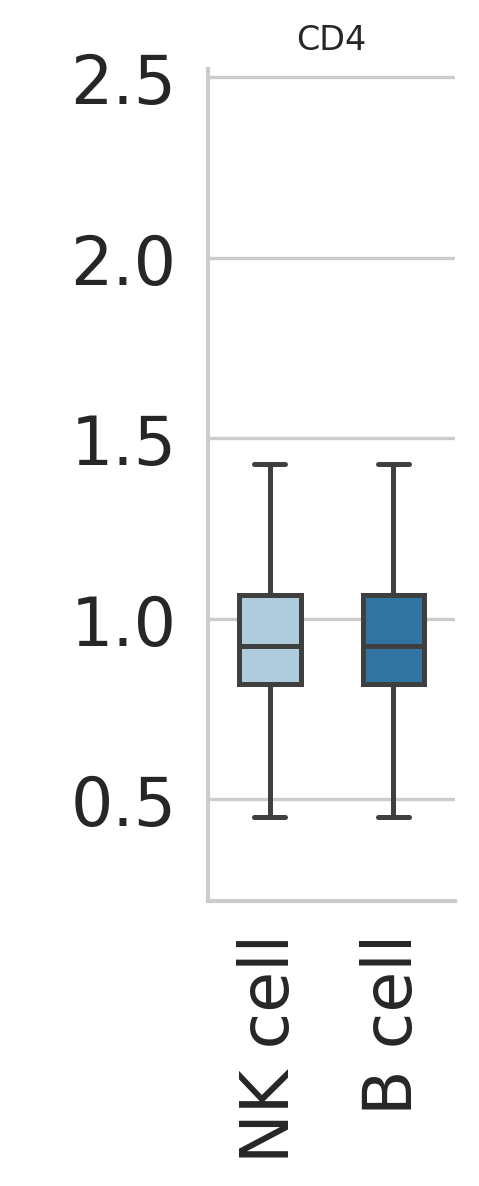

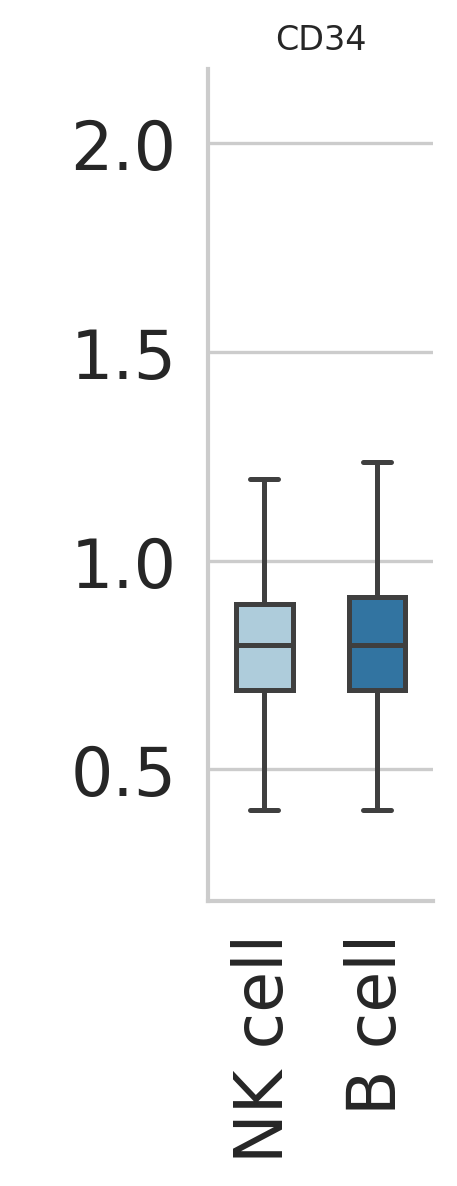

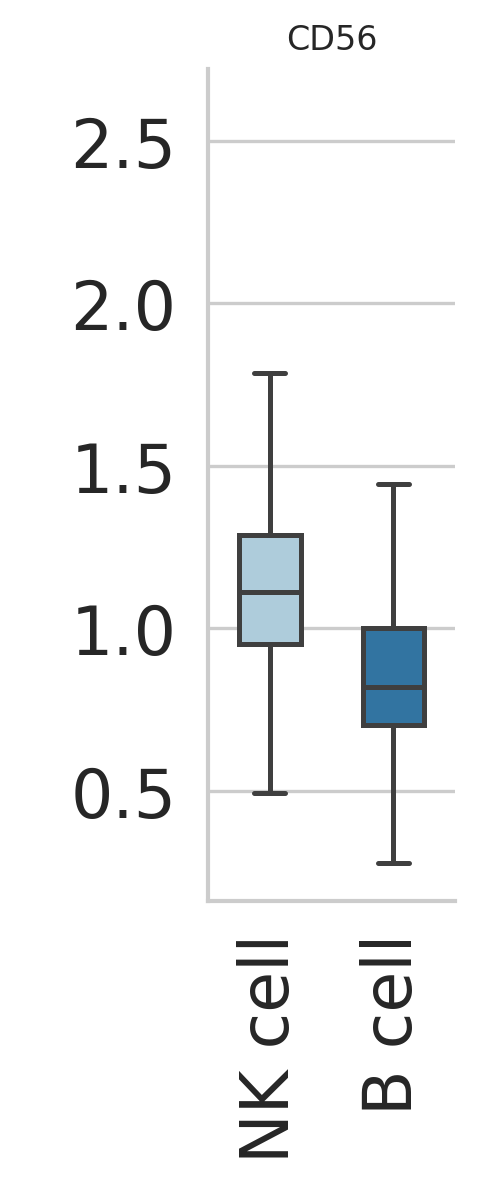

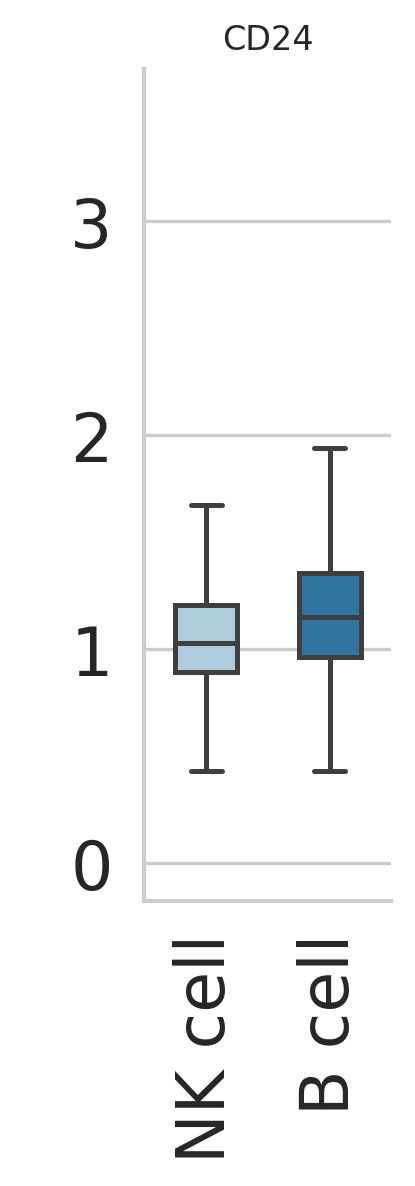

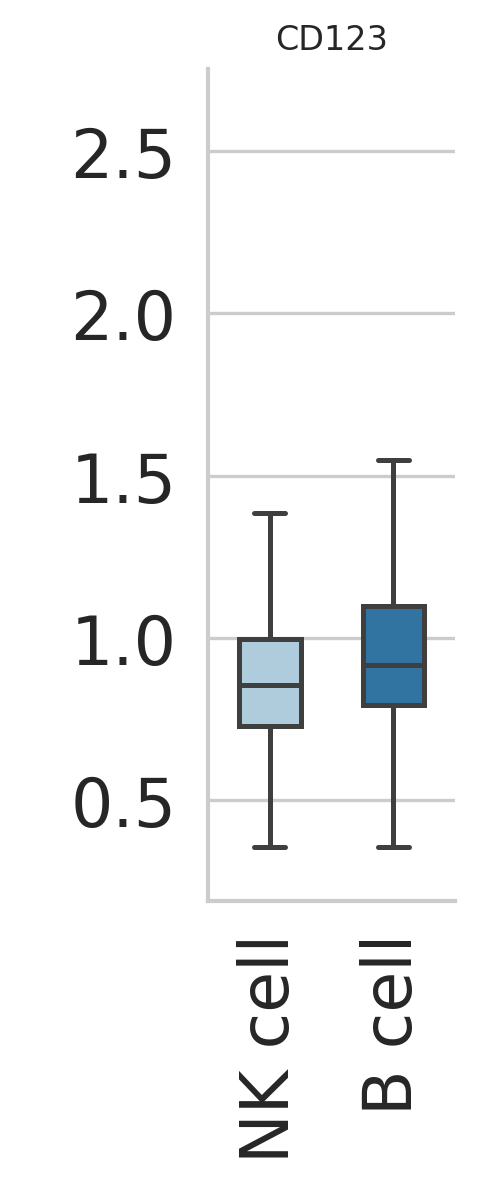

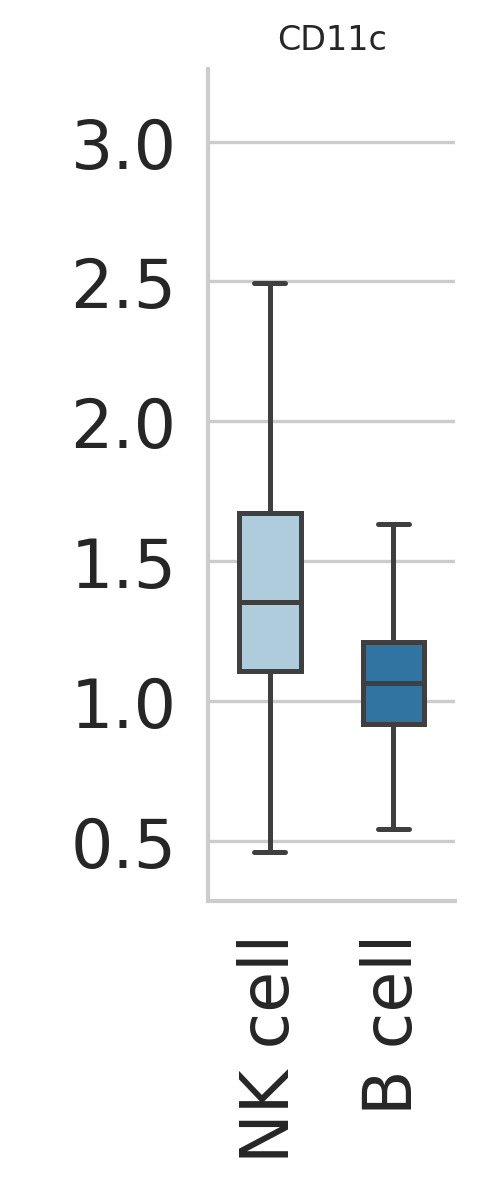

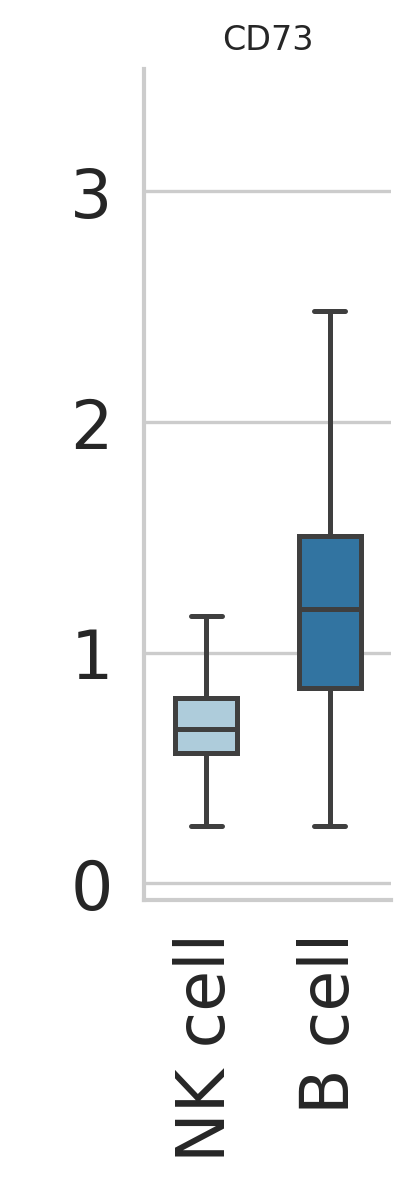

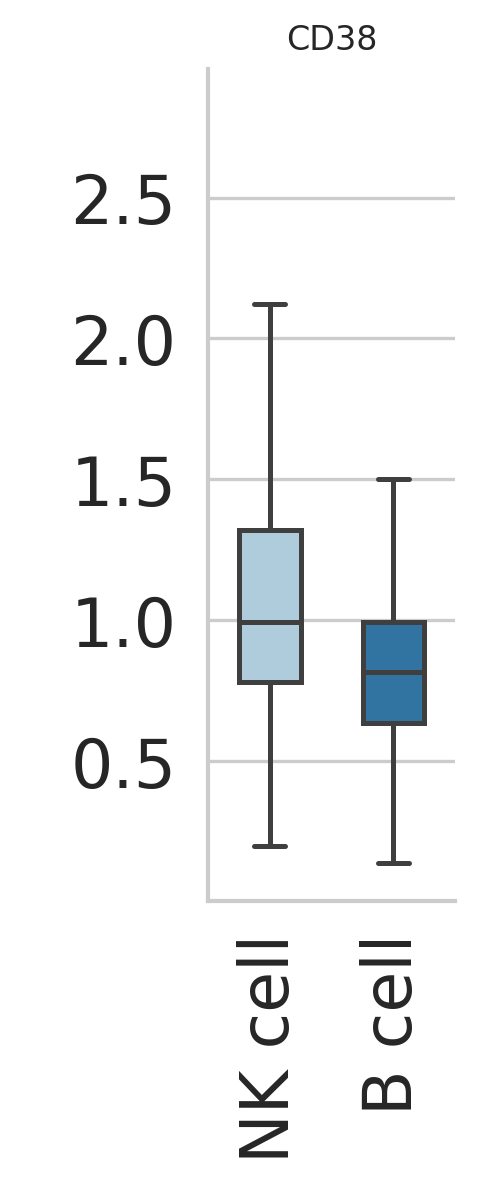

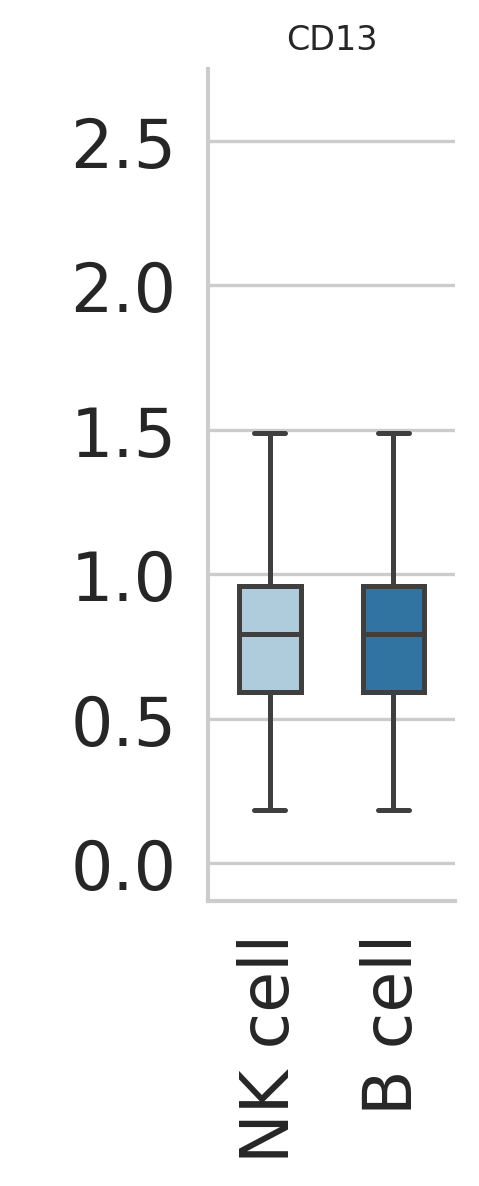

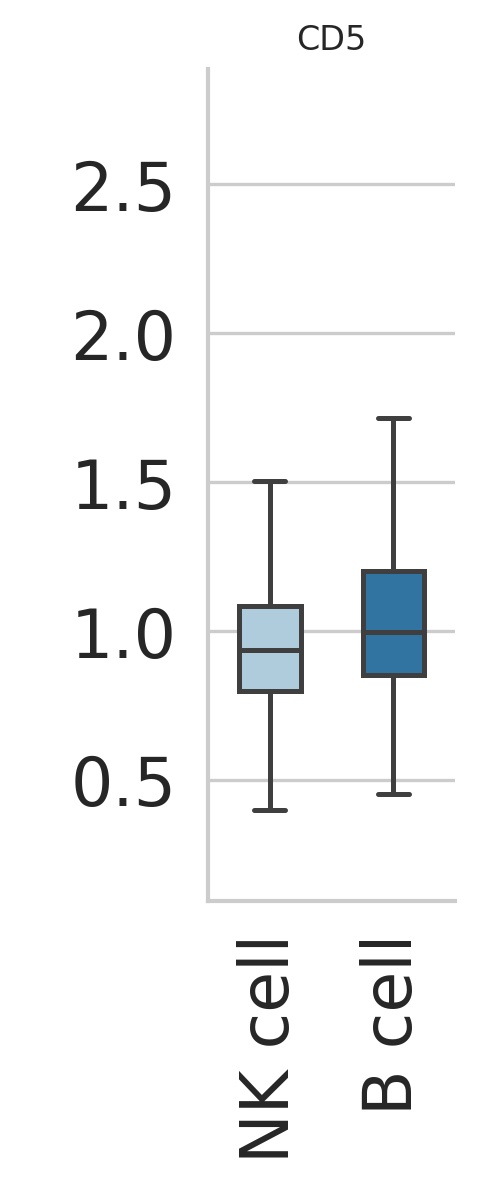

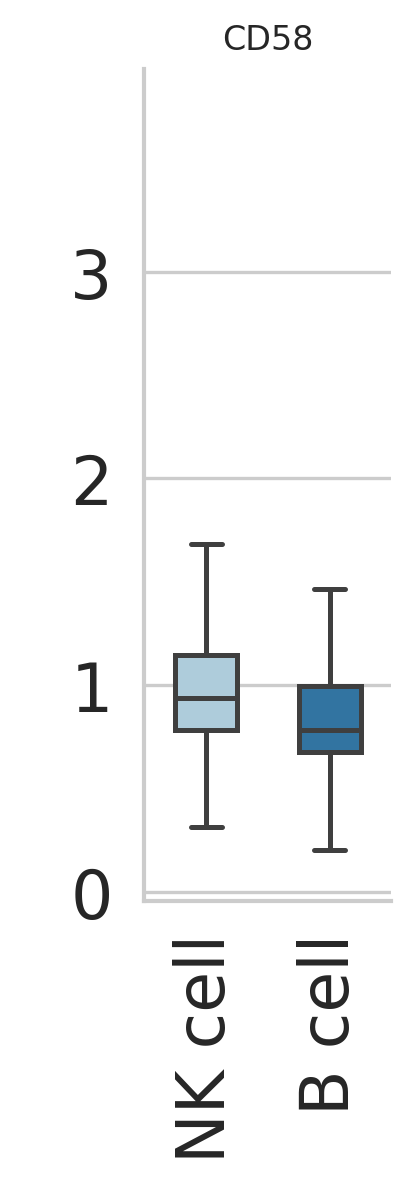

In [20]:
#CLR

for prot in df_clr[df_clr.columns[:-1]]:
    sns.set_theme(style = "whitegrid", font_scale= 0.7)
    ax=sns.catplot(x="cell_type", y=prot, hue="cell_type",
            aspect=.3,fliersize=0,dodge=False, 
            kind="box",palette = 'Paired', data=df_clr,
            width = 0.5)
    ax.fig.set_size_inches(2, 4)
    ax.set_xticklabels(rotation = 90)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.set(xlabel=None)
    ax.set_ylabels(' ', fontsize= 10)
    #sns.move_legend(ax, "upper right", bbox_to_anchor=(.85, .9), title='Cell type')
    plt.title(prot, fontsize=10)